In [21]:
import pickle
import numpy as np
import pandas as pd
import math 

# retreiving all the category
p1 = open("easy_time_mem_easy","rb")
easy_time_mem_easy = pickle.load(p1)
print(easy_time_mem_easy.shape)

p2 = open("easy_time_mem_medium","rb")
easy_time_mem_medium = pickle.load(p2)
print(easy_time_mem_medium.shape)

p3 = open("easy_time_mem_hard","rb")
easy_time_mem_hard = pickle.load(p3)
print(easy_time_mem_hard.shape)

p4 = open("medium_time_mem_easy","rb")
medium_time_mem_easy = pickle.load(p4)
print(medium_time_mem_easy.shape)

p5 = open("medium_time_mem_medium","rb")
medium_time_mem_medium = pickle.load(p5)
print(medium_time_mem_medium.shape)

p6 = open("medium_time_mem_hard","rb")
medium_time_mem_hard = pickle.load(p6)
print(medium_time_mem_hard.shape)

p7 = open("hard_time_mem_easy","rb")
hard_time_mem_easy = pickle.load(p7)
print(hard_time_mem_easy.shape)

p8 = open("hard_time_mem_medium","rb")
hard_time_mem_medium = pickle.load(p8)
print(hard_time_mem_medium.shape)

p9 = open("hard_time_mem_hard","rb")
hard_time_mem_hard = pickle.load(p9)
print(hard_time_mem_hard.shape)

p10 = open("rows","rb") # common top features  of easy , medium ,hard time category
rows = pickle.load(p10)
#rows



(16348, 101)
(11, 101)
(11, 101)
(14, 101)
(38, 101)
(4, 101)
(4, 101)
(1, 101)
(1, 101)


In [22]:
print(len(rows))
print(rows)

25
['tCID', 'SOV', 'size_kb', 'IND', 'HGCI', 'classification_time_milsecs', 'consistency_time_milsecs', 'tCOD', 'tNOC', 'EOG', 'MNCARP', 'DTPP', 'aCOD', 'CYC', 'realisation_time_milsecs', 'EFP', 'ELCLSPRT', 'CONJP', 'classification_size_kb', 'IHR', 'ITR', 'aNOP', 'consistency_size_kb', 'CAL_TIME', 'aCID']


In [23]:
hard_time_mem_easy_copy=hard_time_mem_easy.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True)
easy_time_mem_easy_copy=(easy_time_mem_easy.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))
easy_time_mem_medium_copy=(easy_time_mem_medium.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))
easy_time_mem_hard_copy=(easy_time_mem_hard.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))
medium_time_mem_easy_copy=(medium_time_mem_easy.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))
medium_time_mem_medium_copy=(medium_time_mem_medium.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))
medium_time_mem_hard_copy=(medium_time_mem_hard.sort_values(by=["consistency_size_kb"], ascending=False,ignore_index=True))


#**************** Some more analysis ********************************************
#*****  I have taken the ontologies which have easy time but more memory in 'easy_time_easy_memory' category
# also I have taken the ontologies which have hard time but have less memory in 'hard_time_easy_memory' category
#this means that there are some ontolgies which have taken more memory but less time compare to those ones present 
#in 'easy_time_easy_memory' category.

# So for this we have the ontologies from easy_time_easy_memory category which have conistency_size_kb value more
# than the minimum value of consistency_size_kb in hard_time_easy_memory category.

# Here we have plots for both of this category side by side for each of the features, whihc helps to gain a rough
# idea about which features are much responsible for taking greater memory in easy_time_easy_memory category

val=np.min(hard_time_mem_easy["consistency_size_kb"])
print(val)

easy_time_mem_easy_copy=(easy_time_mem_easy_copy[easy_time_mem_easy_copy["consistency_size_kb"]>=val])[rows]
easy_time_mem_easy_copy
#hard_time_mem_easy_copy
#easy_time_mem_hard_copy

1352844


,tCID,SOV,size_kb,IND,HGCI,classification_time_milsecs,consistency_time_milsecs,tCOD,tNOC,EOG,...,EFP,ELCLSPRT,CONJP,classification_size_kb,IHR,ITR,aNOP,consistency_size_kb,CAL_TIME,aCID
0,345774,896102,260198,246273,4,122102,118837,2299,143,2.720791,...,0.4375,0.969697,0.4062,21460440,615096,98278,1.101796,21437240,511720,2070.502994
1,345823,896097,260196,246271,3,109428,120335,2342,127,2.720748,...,0.5417,0.993506,0.4167,20747428,615095,0,1.025641,20712600,308820,2216.814103
2,2473005,525694,423976,289236,29843,2299432,107499,2897024,1185973,2.544736,...,0.5373,0.999953,0.4626,23064852,1180373,245788,2.138706,10438360,901940,2.785941
3,138932,385148,102413,97672,17,50365,50773,2159,121,2.539535,...,0.5000,0.987179,0.4231,10261900,272135,38993,0.993671,10250036,68420,879.316456
4,138991,385156,102417,97674,4,48873,51119,2300,143,2.539948,...,0.4375,0.969697,0.4062,8619240,243535,38993,1.101796,8598024,66110,832.281437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,659456,148980,131660,0,0,14977,14198,744129,615897,3.192595,...,0.9999,1.000000,0.0001,1847004,151,0,3.640365,1506872,51670,3.426725
75,697224,42271,67158,583429,3115,12113,13241,134953,81155,0.622246,...,0.8521,1.000000,0.1479,1774852,0,2595,1.616939,1502756,43250,11.020865
76,1731,750,365,1504,9,2352,939,860,501,1.936658,...,0.0000,0.895050,0.0000,1519088,2,0,1.138067,1479316,300,3.414201
77,618805,8433,60542,8250,0,9476,9781,735742,26,3.349375,...,0.0000,0.066125,0.0659,1435340,0,0,0.999920,1432012,49220,4.941743


In [24]:
hard_time_mem_easy_copy=hard_time_mem_easy_copy[rows]
hard_time_mem_easy_copy

,tCID,SOV,size_kb,IND,HGCI,classification_time_milsecs,consistency_time_milsecs,tCOD,tNOC,EOG,...,EFP,ELCLSPRT,CONJP,classification_size_kb,IHR,ITR,aNOP,consistency_size_kb,CAL_TIME,aCID
0,1342,2801,1180,988,41,656914,21600095,303,96,1.929521,...,0.1549,0.742857,0.2113,1097220,5,3,1.050847,1423224,180,7.581921
1,1337,2798,1178,987,40,21600094,21600095,296,94,1.927396,...,0.1594,0.750000,0.2174,1420944,5,3,1.045977,1411176,230,7.683908
2,1268,2730,1150,986,40,21600114,21600056,270,78,1.895015,...,0.1642,0.728477,0.2239,1394612,5,3,1.039216,1387476,340,8.287582
3,366,209,64,1,0,21600477,21600051,698,0,1.597810,...,0.2094,0.716332,0.2723,18797388,0,0,0.997143,1352844,80,1.045714


tCID
easy average=  937597.2025316455 hard average=  1078.25


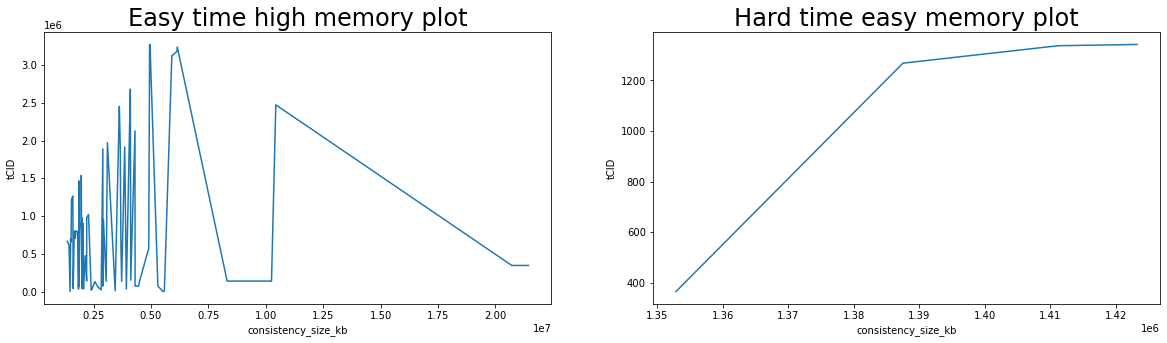

SOV
easy average=  242161.2405063291 hard average=  2134.5


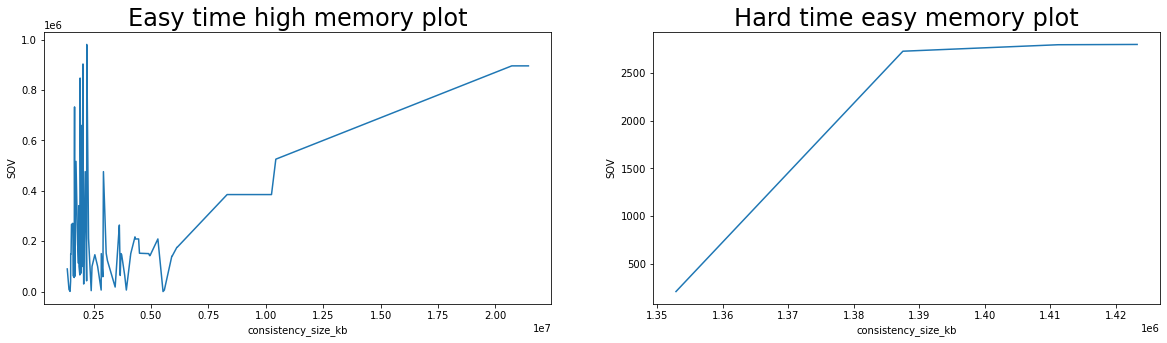

size_kb
easy average=  202685.16455696203 hard average=  893.0


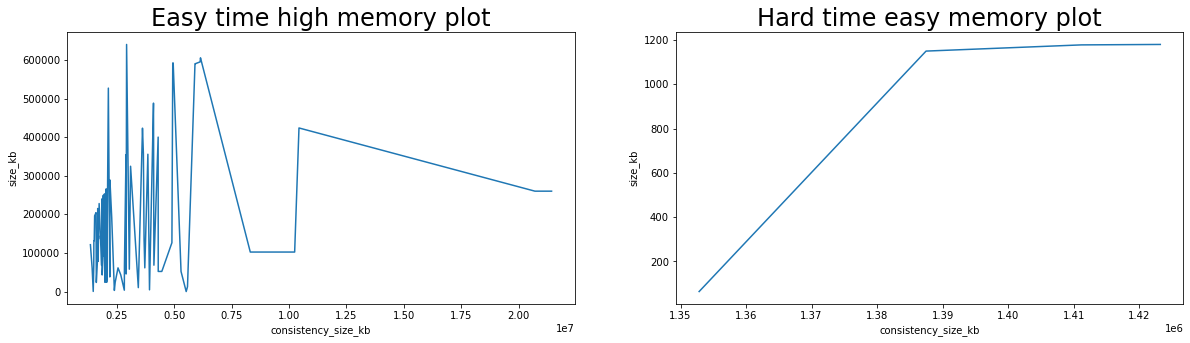

IND
easy average=  102588.26582278482 hard average=  740.5


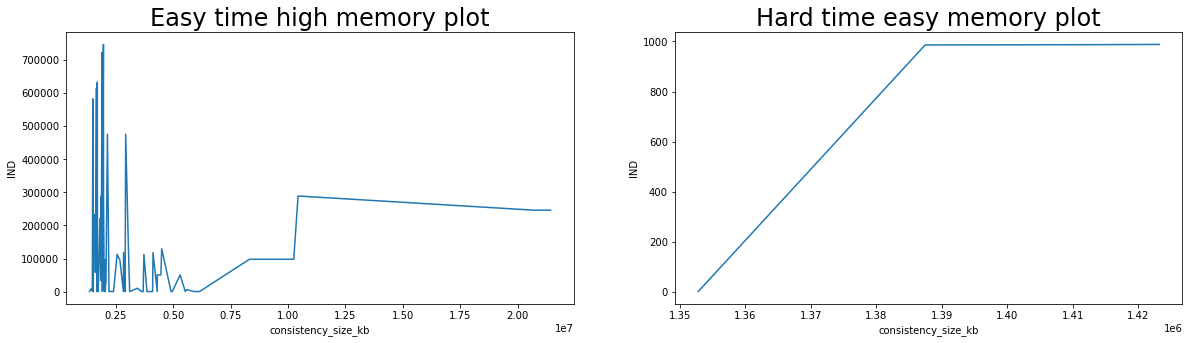

HGCI
easy average=  1966.6835443037974 hard average=  30.25


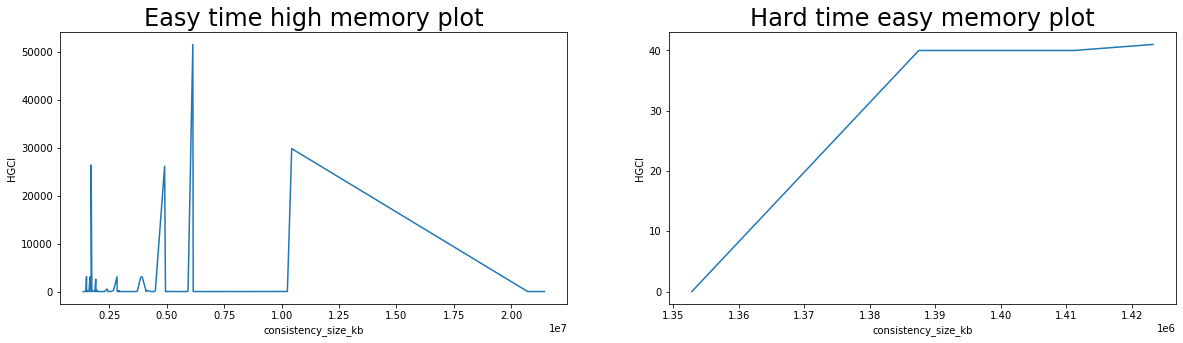

classification_time_milsecs
easy average=  441665.60759493674 hard average=  16364399.75


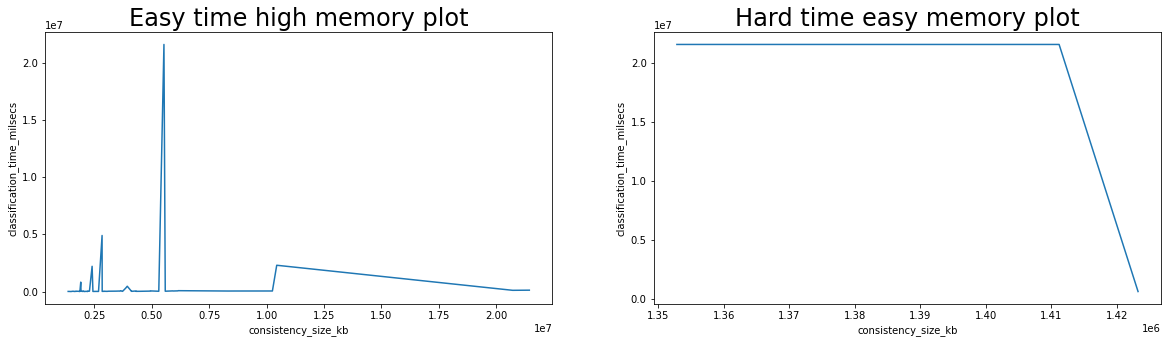

consistency_time_milsecs
easy average=  25493.73417721519 hard average=  21600074.25


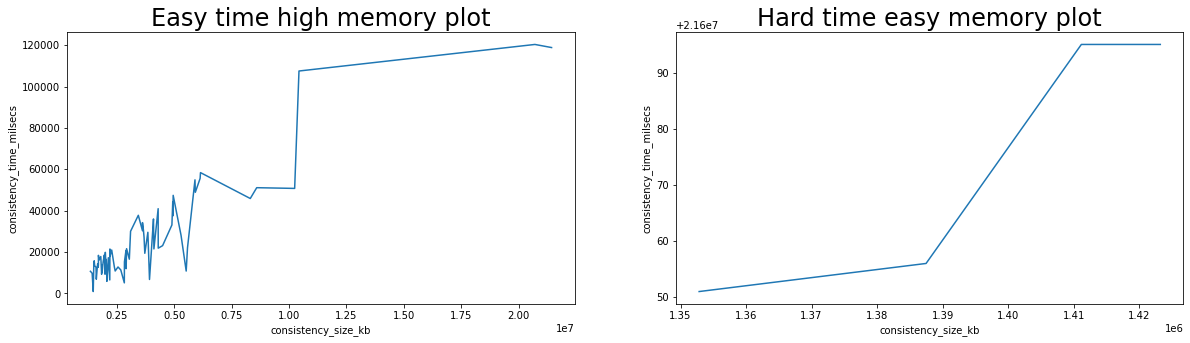

tCOD
easy average=  913202.8227848101 hard average=  391.75


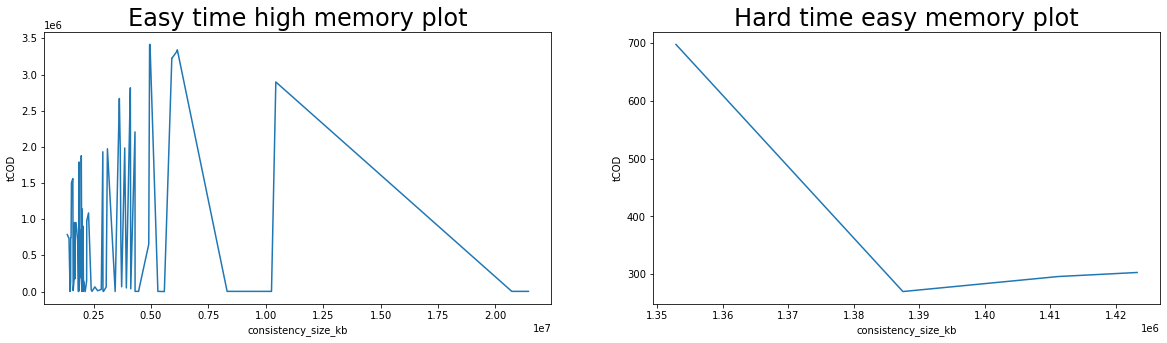

tNOC
easy average=  715907.1898734177 hard average=  67.0


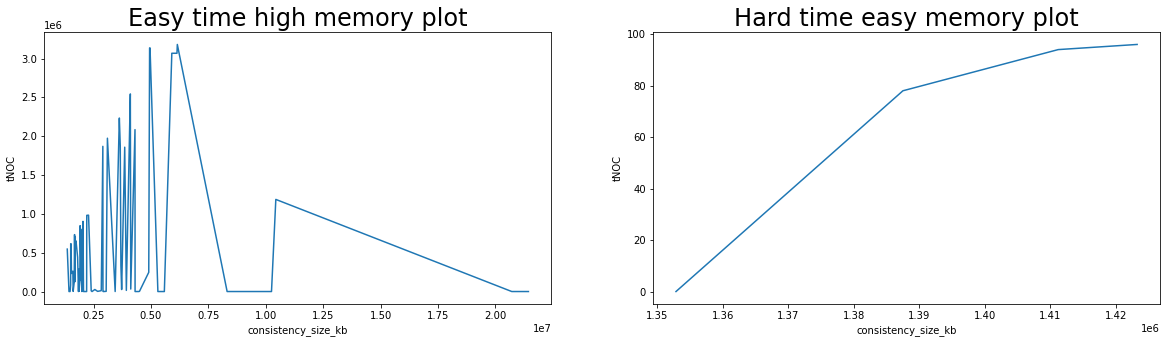

EOG
easy average=  2.592131518987342 hard average=  1.837435


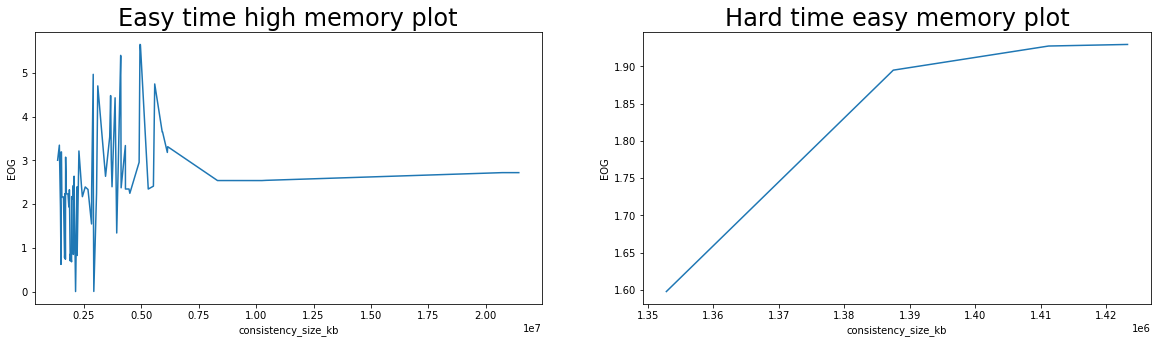

MNCARP
easy average=  0.0087 hard average=  0.061525


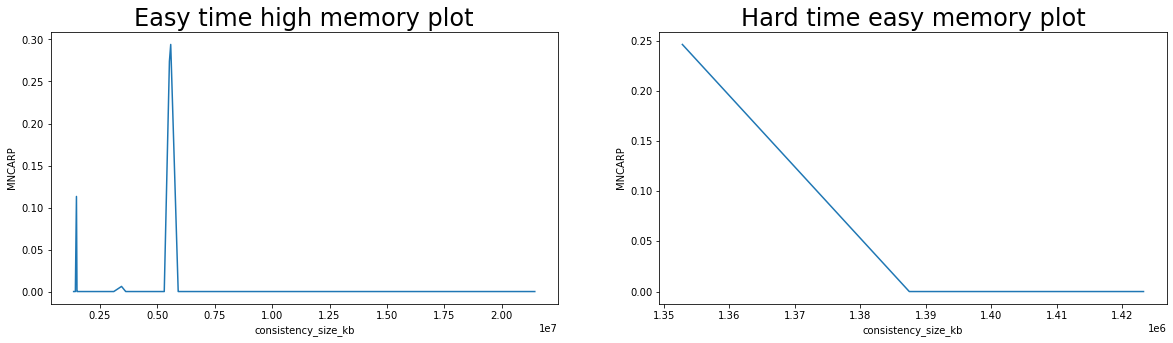

DTPP
easy average=  0.08196962025316455 hard average=  0.514925


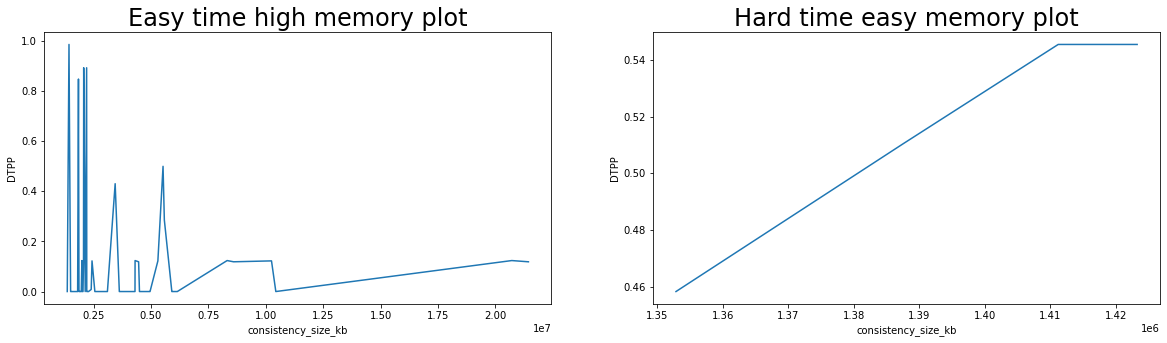

aCOD
easy average=  6.287631392405065 hard average=  1.7930025


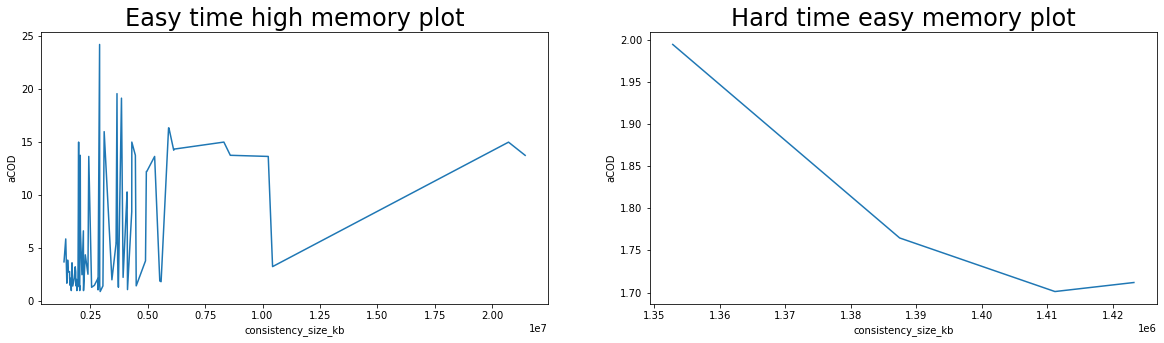

CYC
easy average=  1077937.1012658228 hard average=  953.5


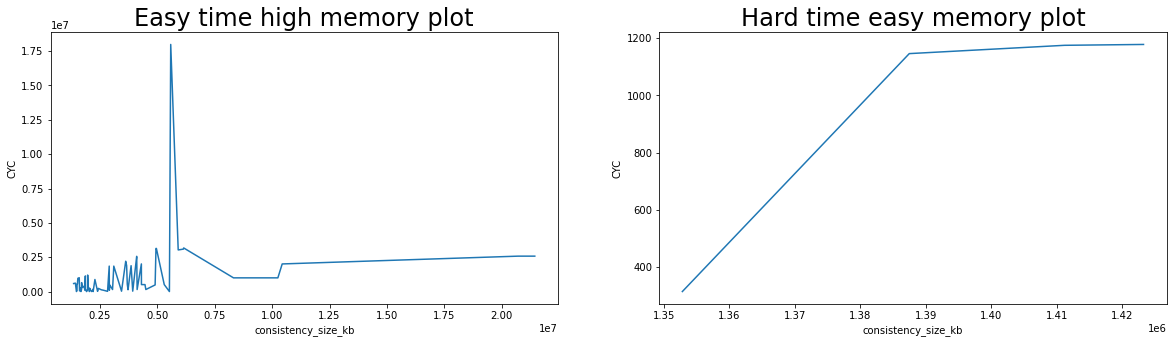

realisation_time_milsecs
easy average=  390020.16455696203 hard average=  21600144.5


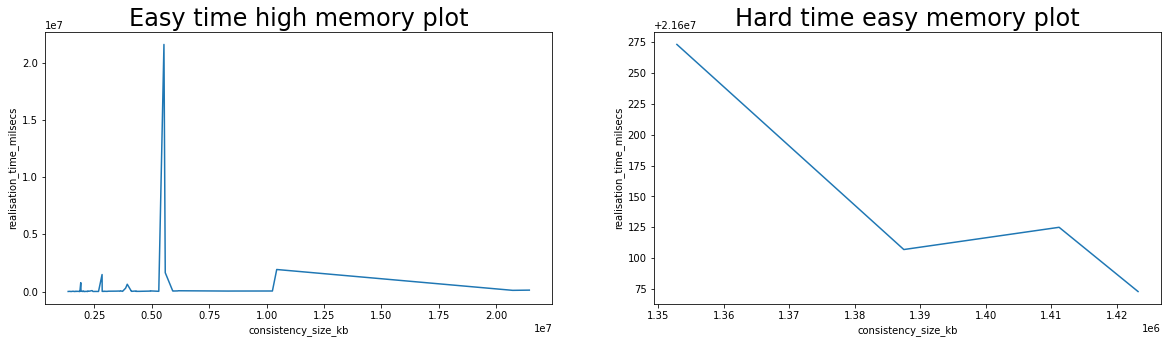

EFP
easy average=  0.6841696202531644 hard average=  0.17197500000000002


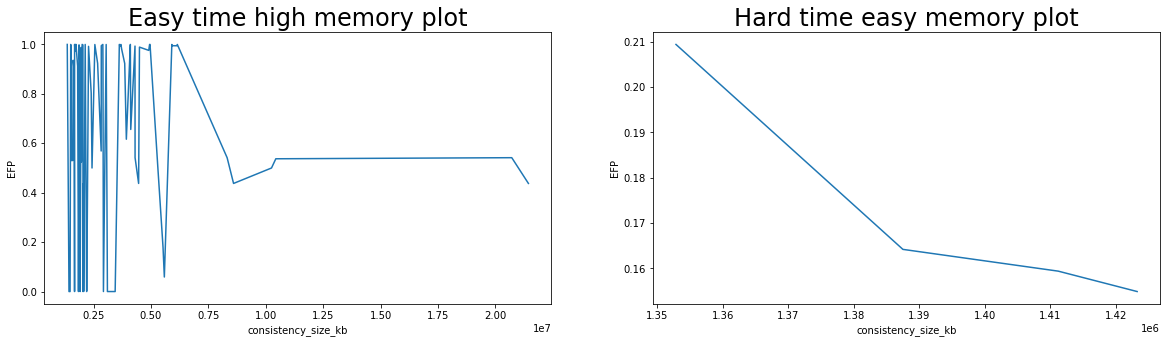

ELCLSPRT
easy average=  0.9483422784810126 hard average=  0.7344175


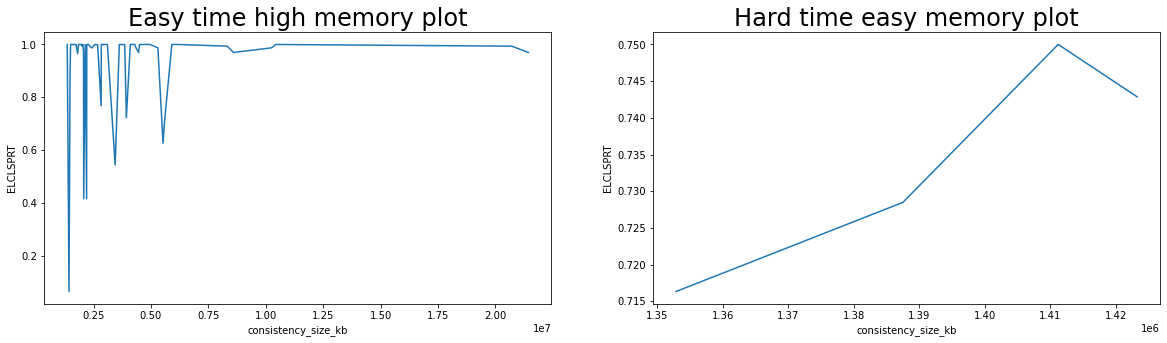

CONJP
easy average=  0.12169493670886075 hard average=  0.23122499999999999


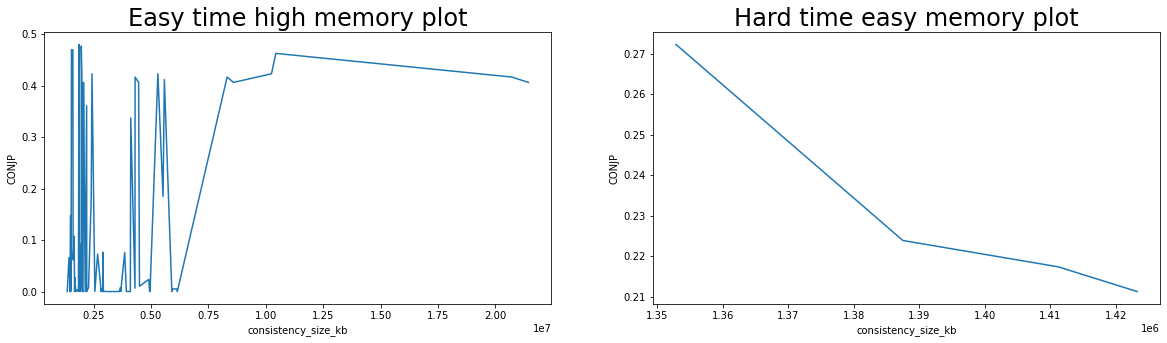

classification_size_kb
easy average=  9093361.51898734 hard average=  5677541.0


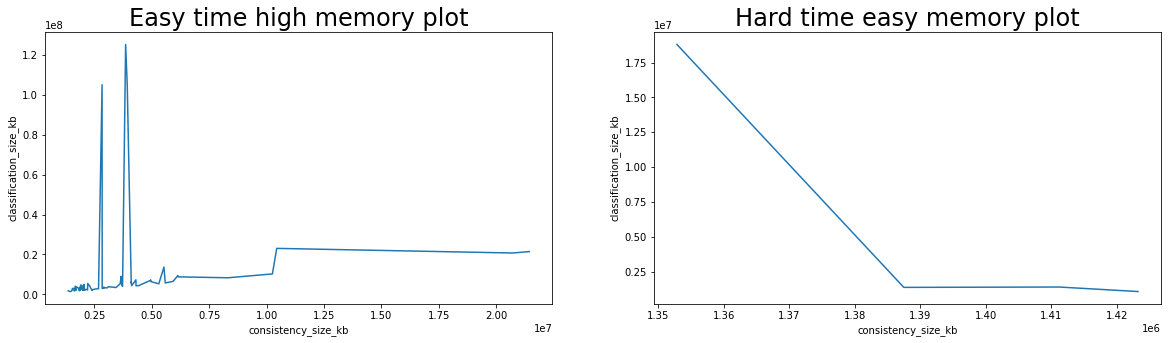

IHR
easy average=  232768.0 hard average=  3.75


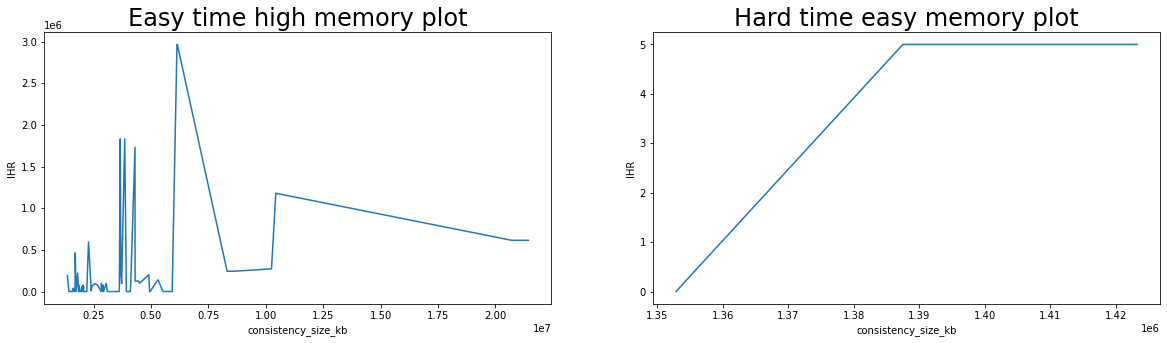

ITR
easy average=  104494.39240506329 hard average=  2.25


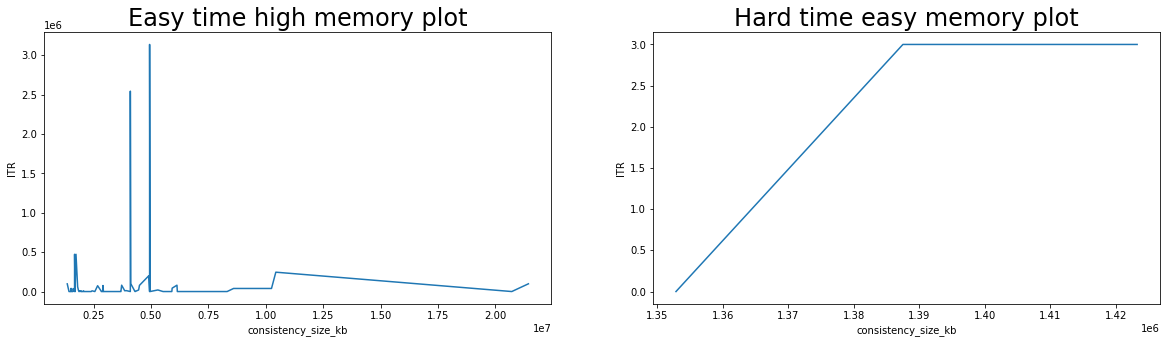

aNOP
easy average=  3.8308463291139234 hard average=  1.0332975


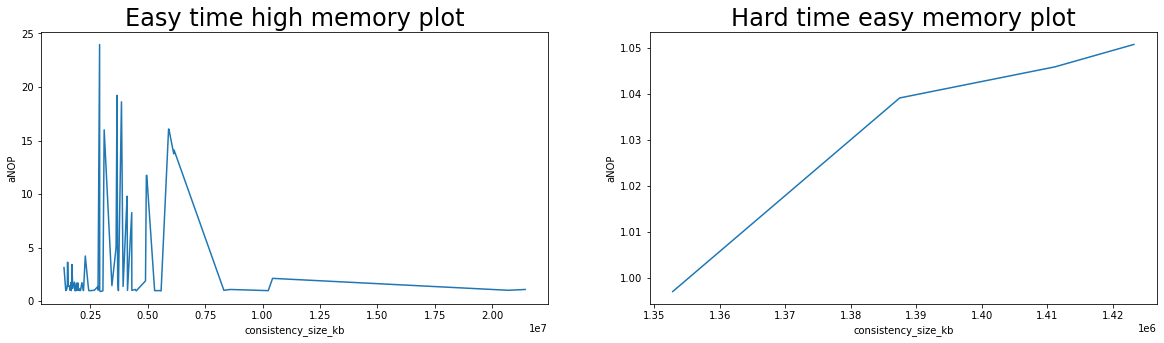

CAL_TIME
easy average=  398976.2025316456 hard average=  207.5


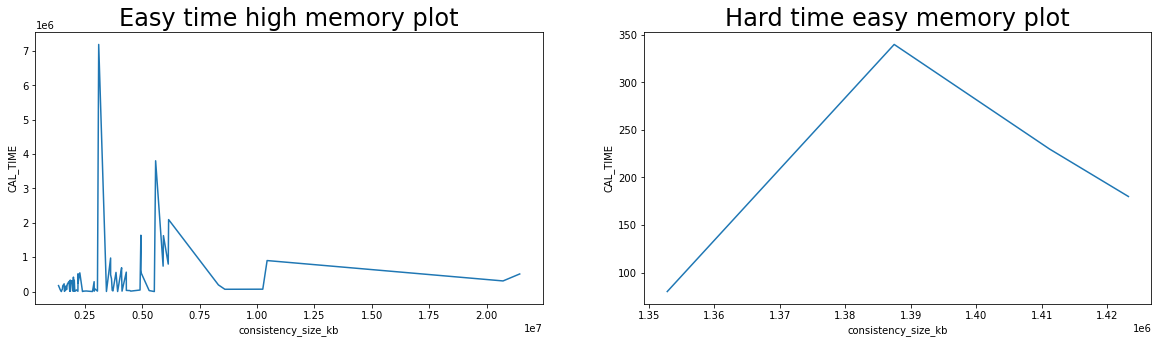

aCID
easy average=  1371.2830362025318 hard average=  6.14978


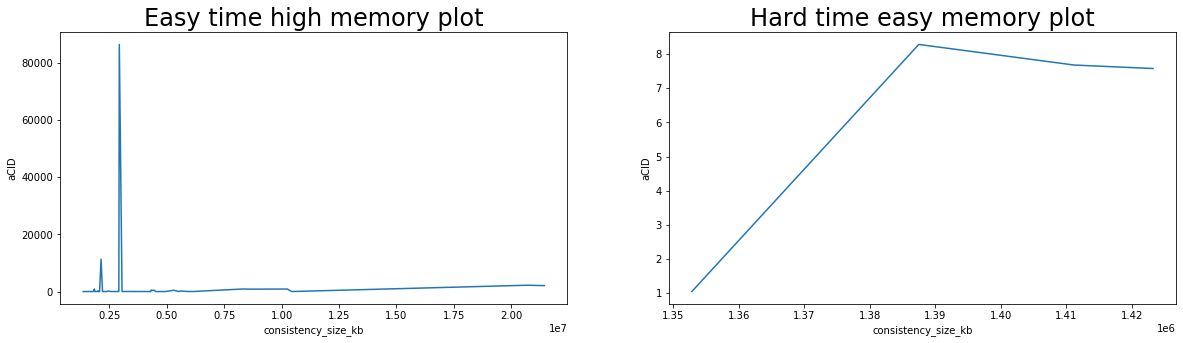

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline



for i in range(len(rows)):
    f=rows[i]
    if f != "consistency_size_kb":
        x_values_easy=np.round((easy_time_mem_easy_copy["consistency_size_kb"]),5)
        y_values_easy=np.round((easy_time_mem_easy_copy[f]),5)
        
        x_values_hard=np.round((hard_time_mem_easy_copy["consistency_size_kb"]),5)
        y_values_hard=np.round((hard_time_mem_easy_copy[f]),5)
        print(f)
        print("easy average= ",np.average(y_values_easy),"hard average= ",np.average(y_values_hard))
        
        fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 5))
        
        ax1.set_title( "Easy time high memory plot" , size = 24 )
        ax1.plot(x_values_easy,y_values_easy)
        ax1.set_xlabel("consistency_size_kb")
        ax1.set_ylabel(f)
        
        ax2.set_title( "Hard time easy memory plot" , size = 24 )
        ax2.plot(x_values_hard,y_values_hard)
        ax2.set_xlabel("consistency_size_kb")
        ax2.set_ylabel(f)
        
        plt.show()
        
        
#********************** ends this analysis ***********************************

0 tCID


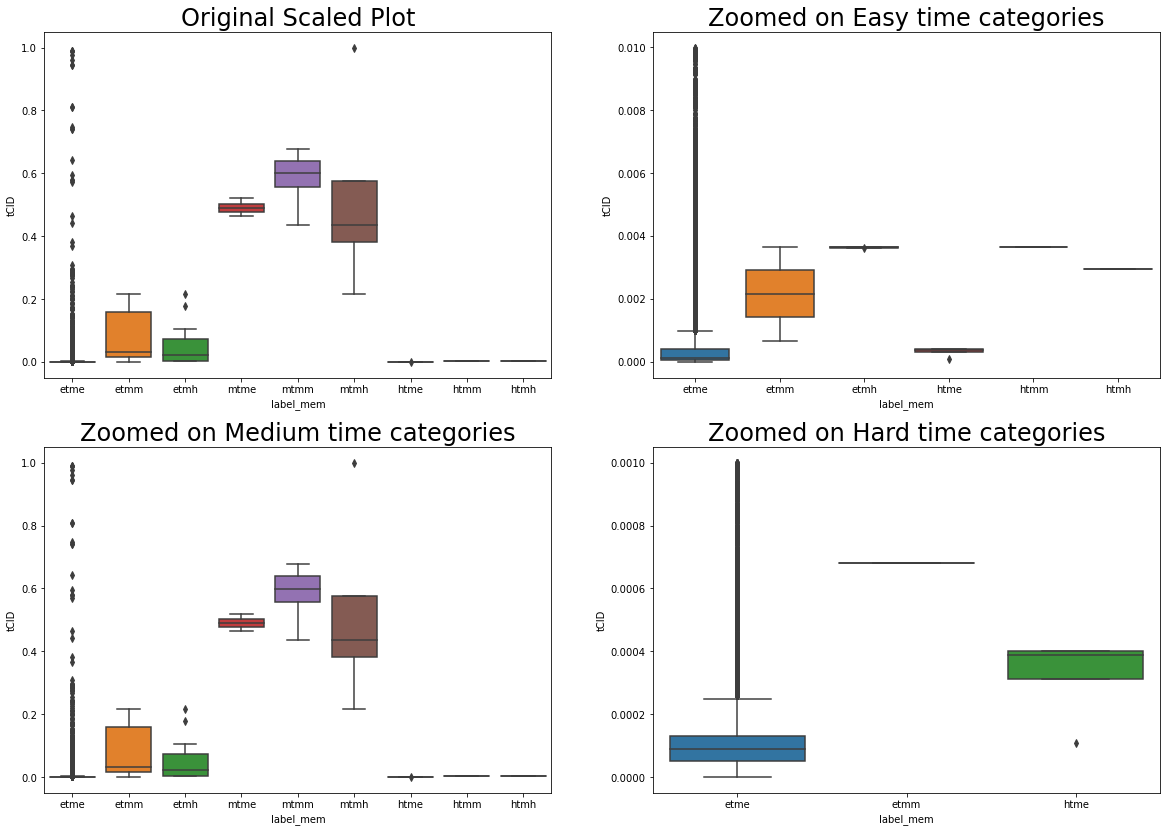

1 SOV


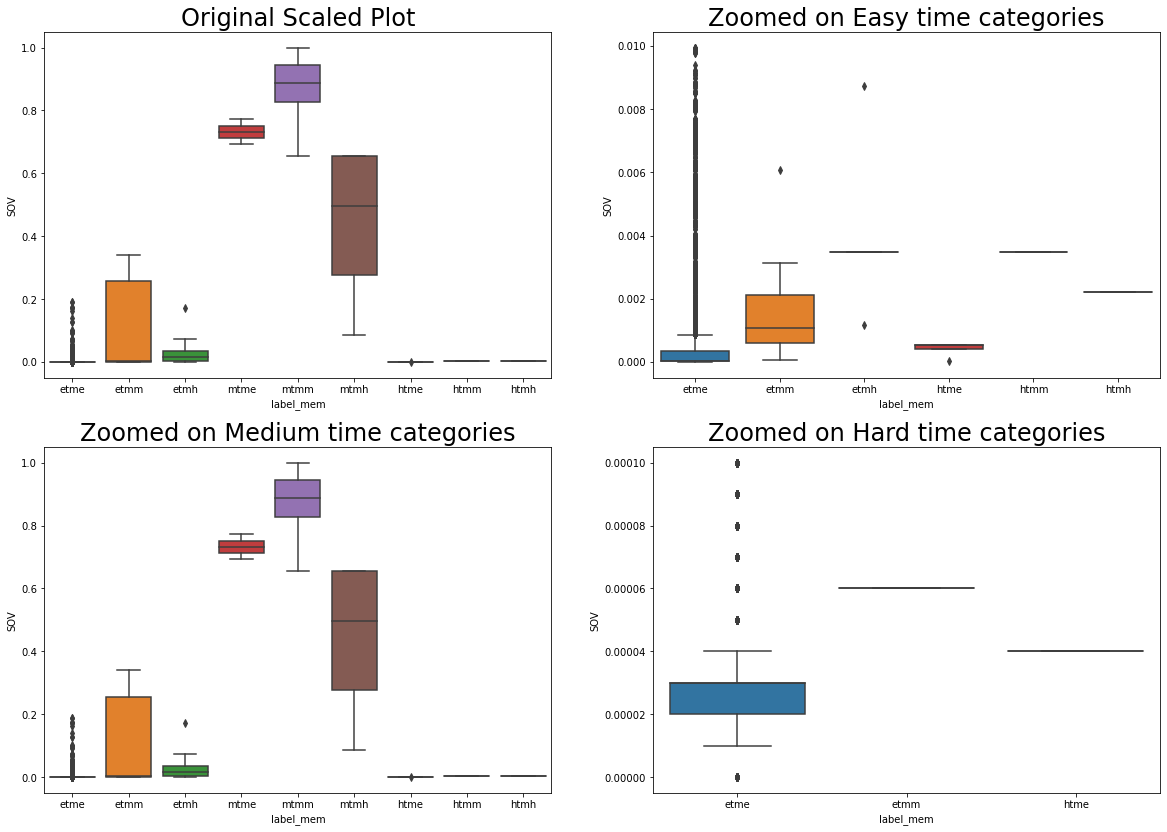

2 size_kb


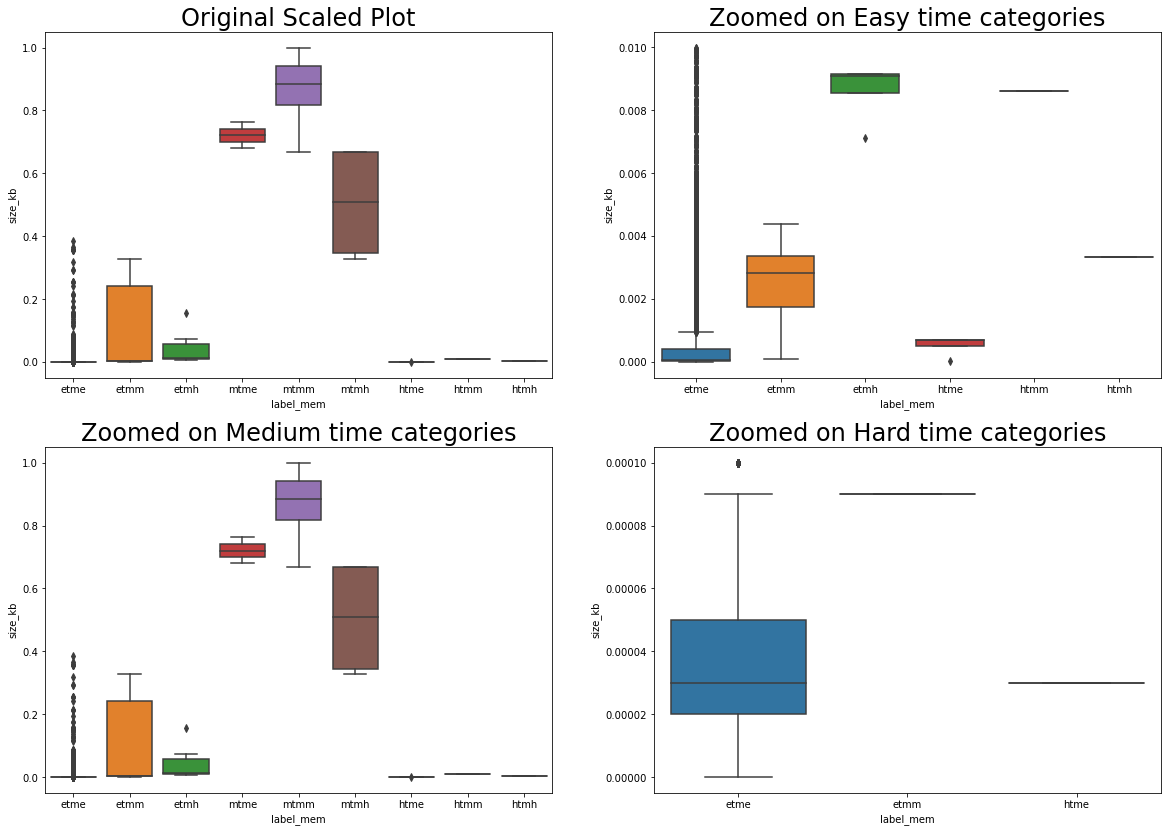

3 IND


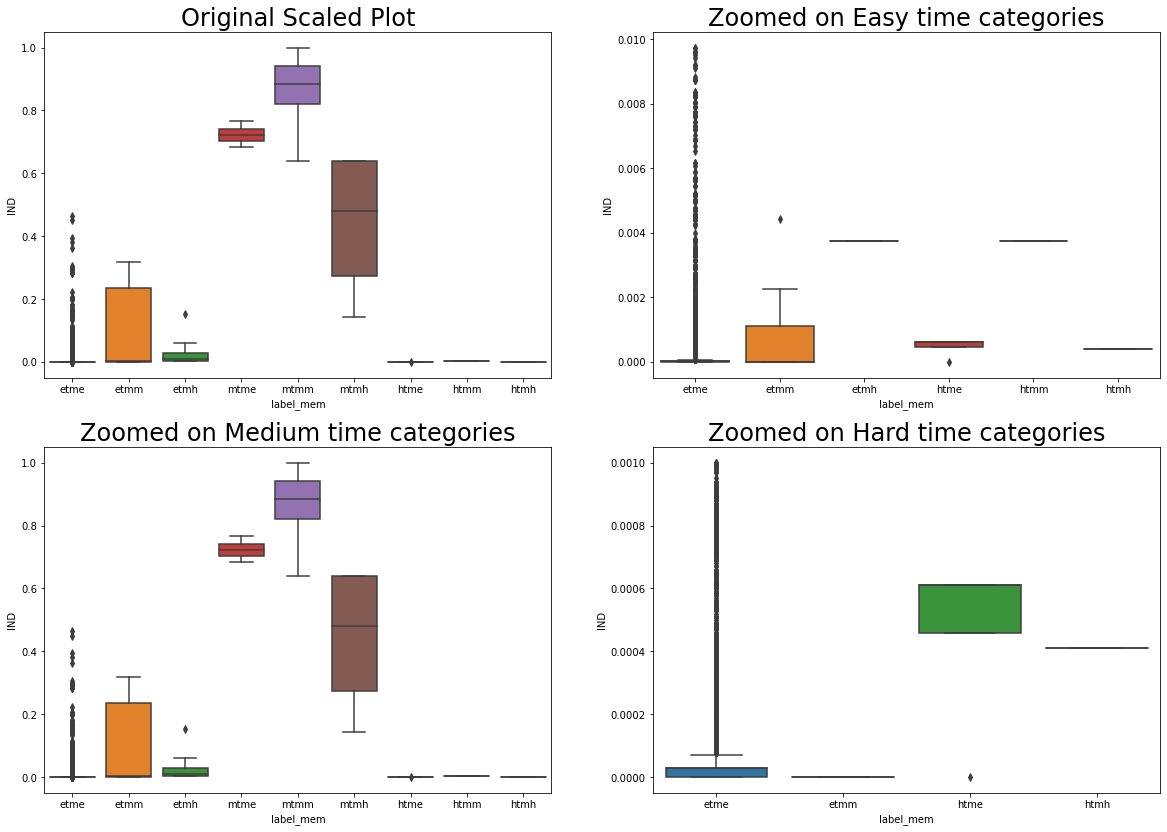

4 HGCI


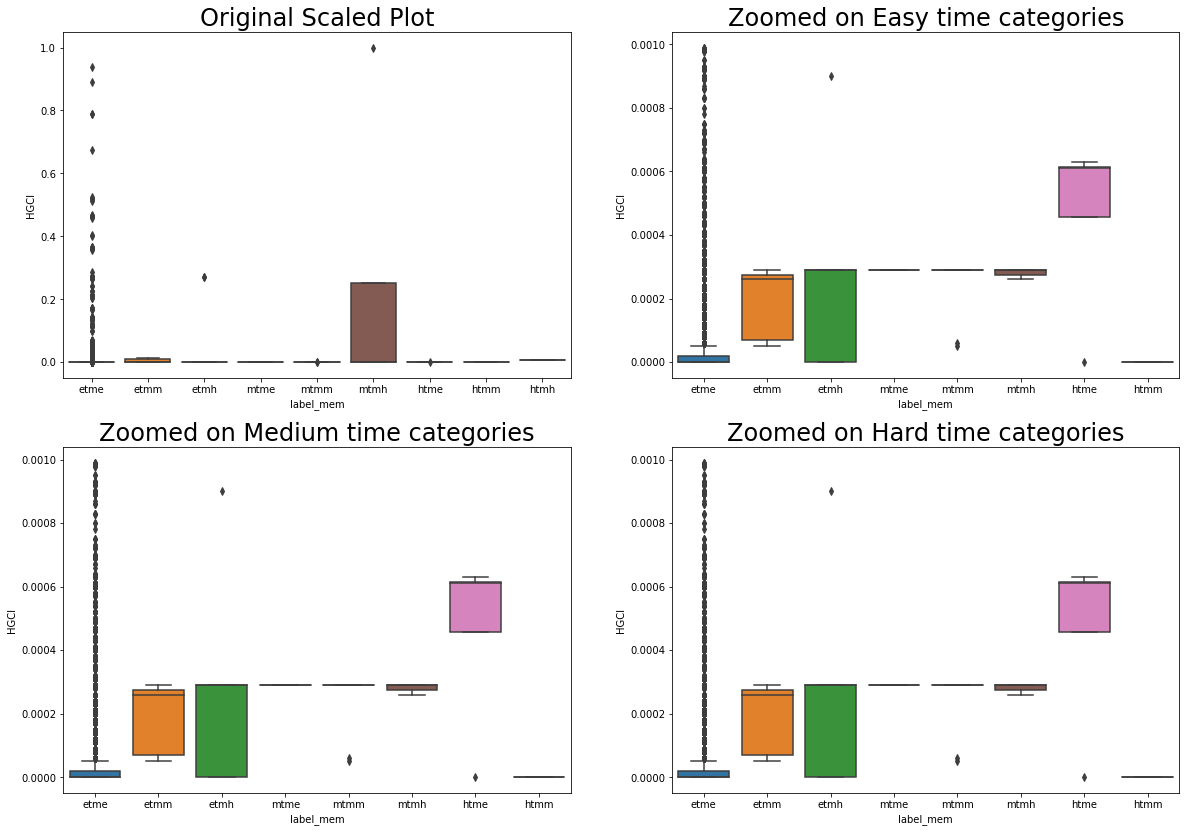

5 classification_time_milsecs


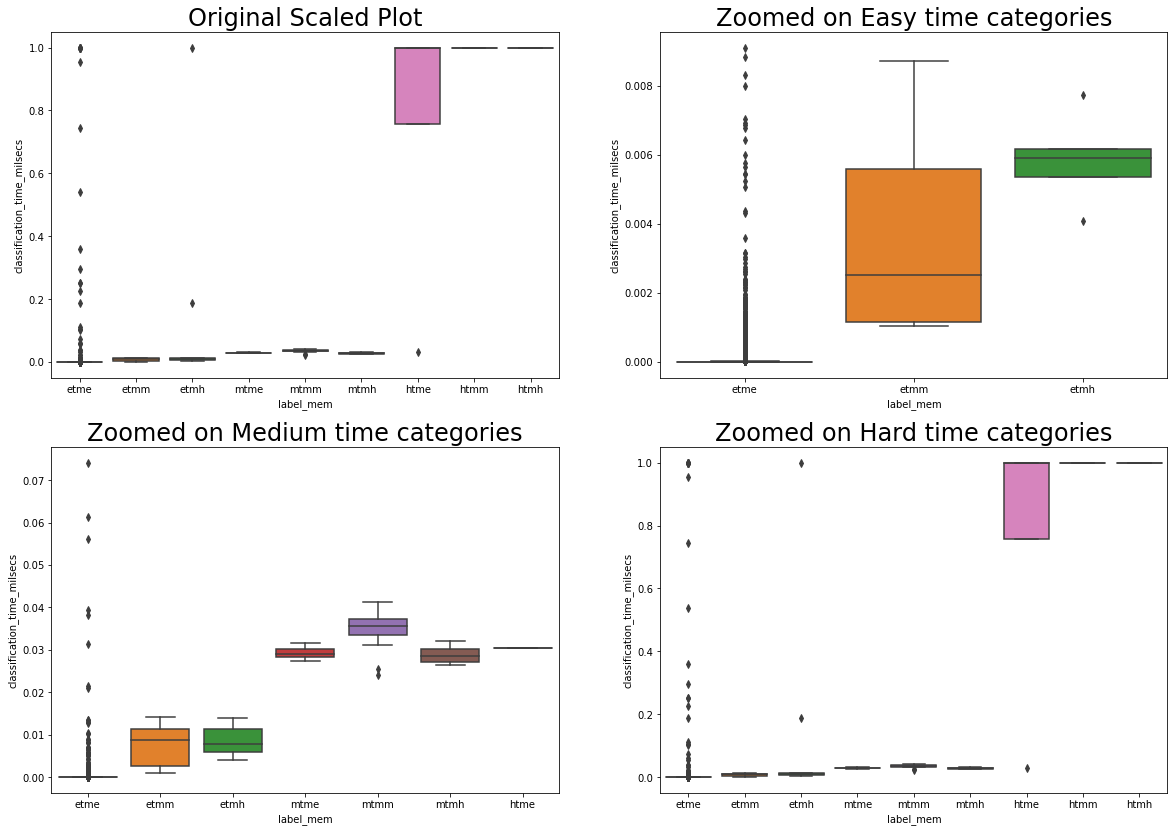

6 consistency_time_milsecs


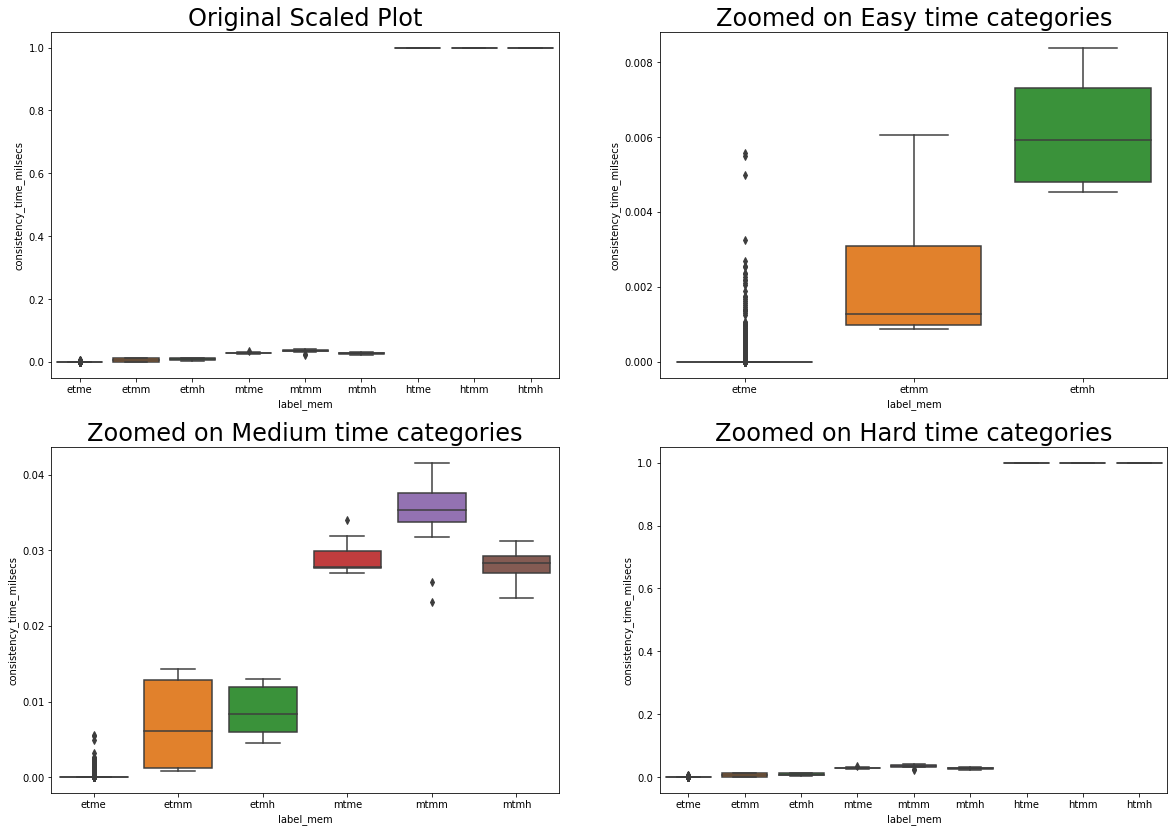

7 tCOD


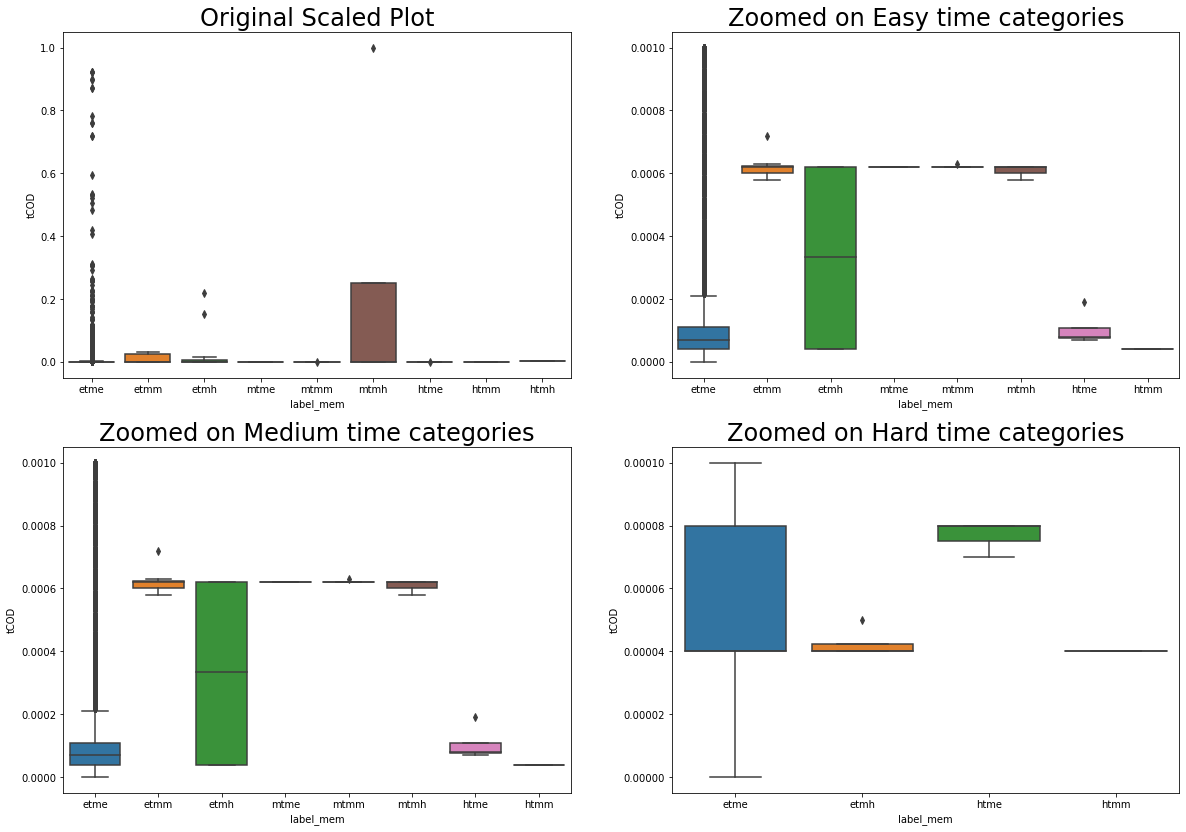

8 tNOC


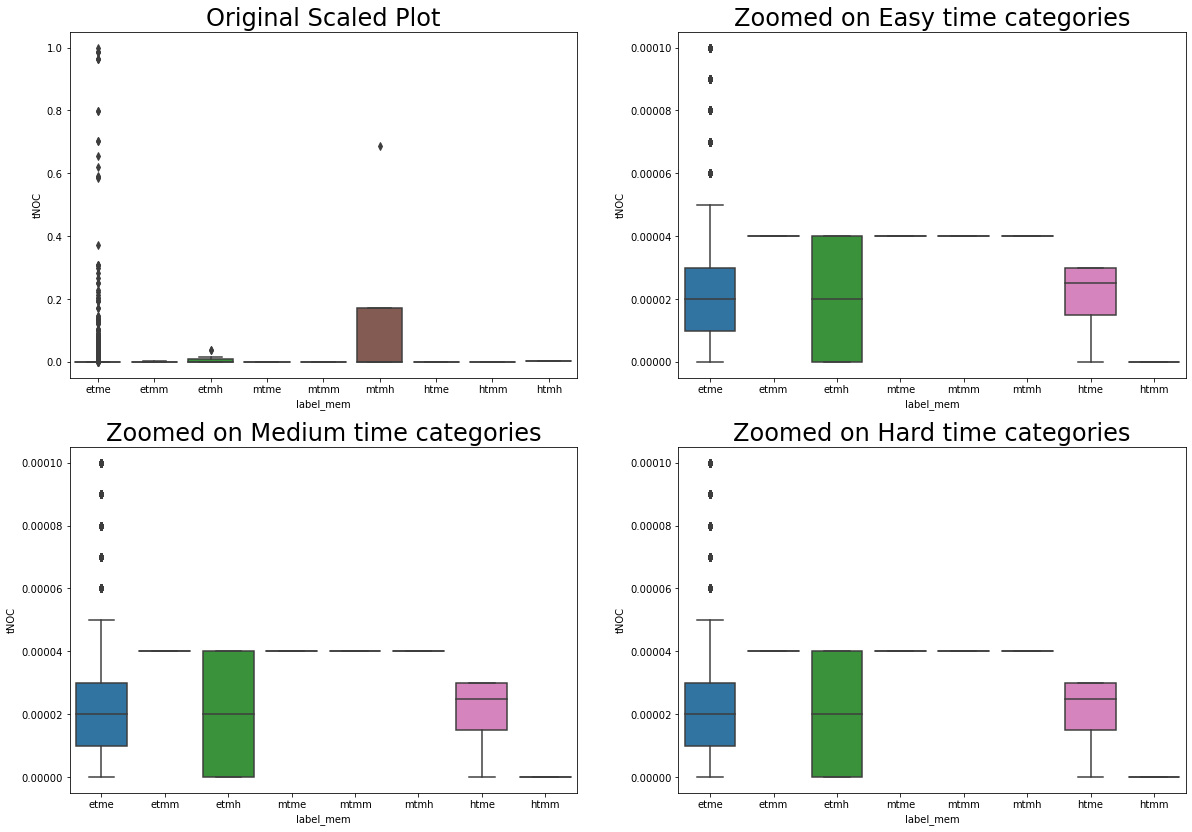

9 EOG


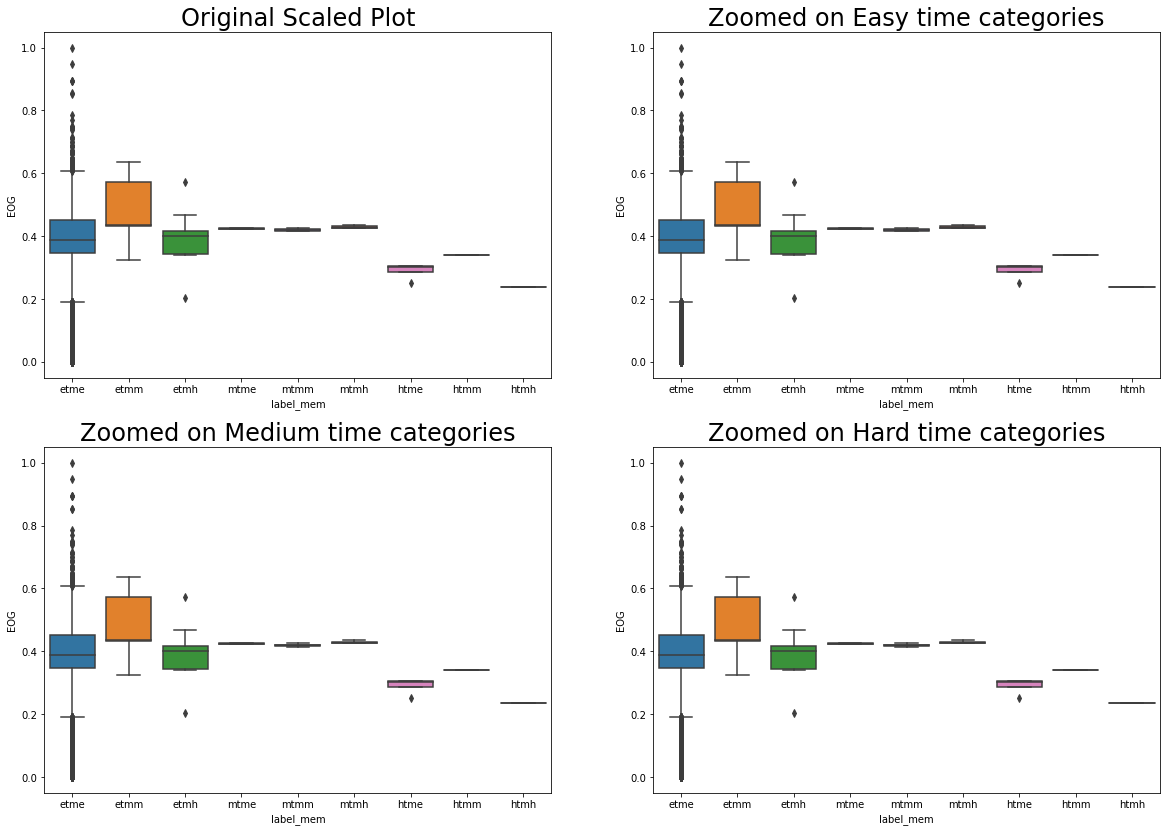

10 MNCARP


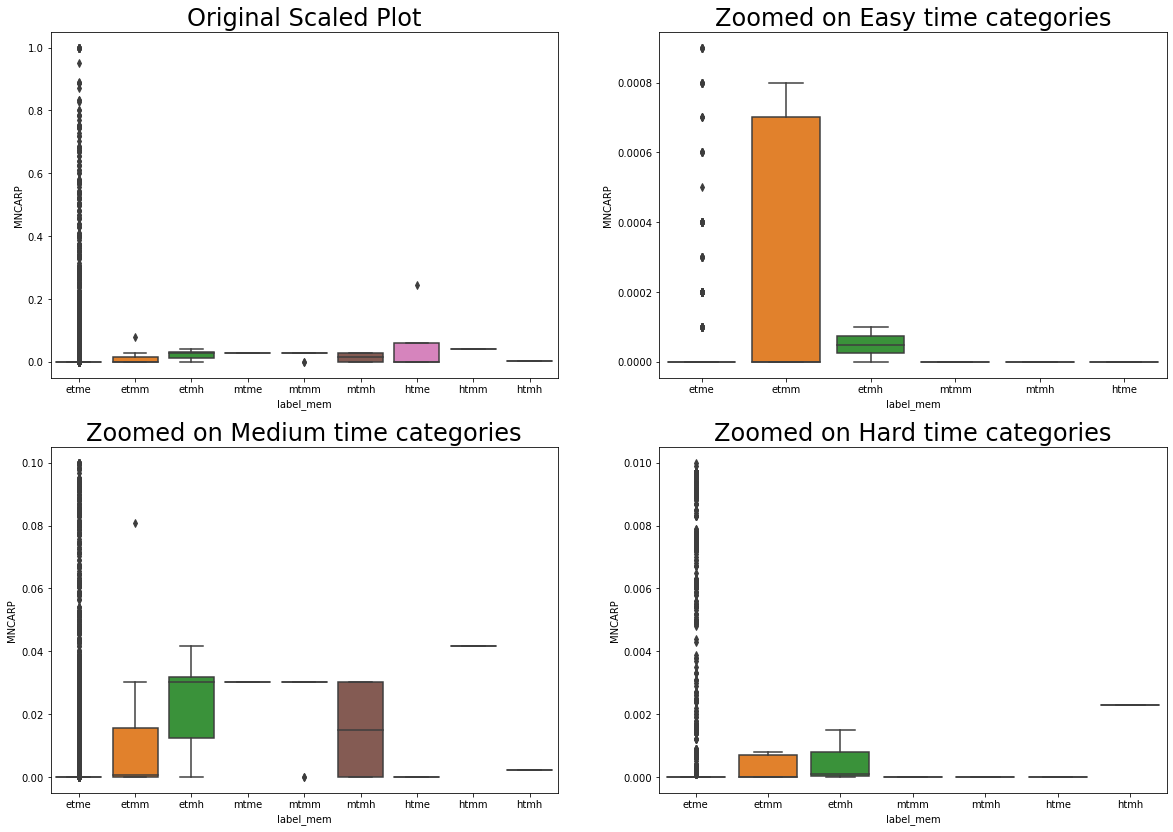

11 DTPP


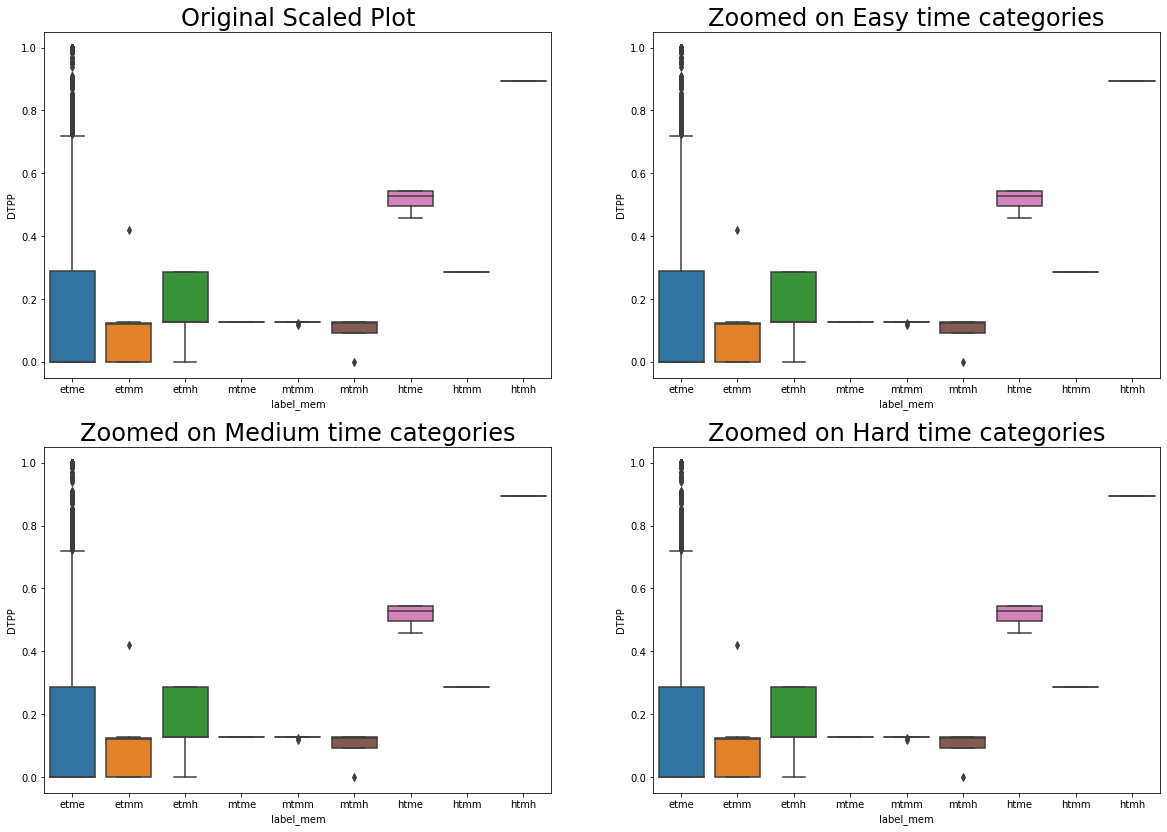

12 aCOD


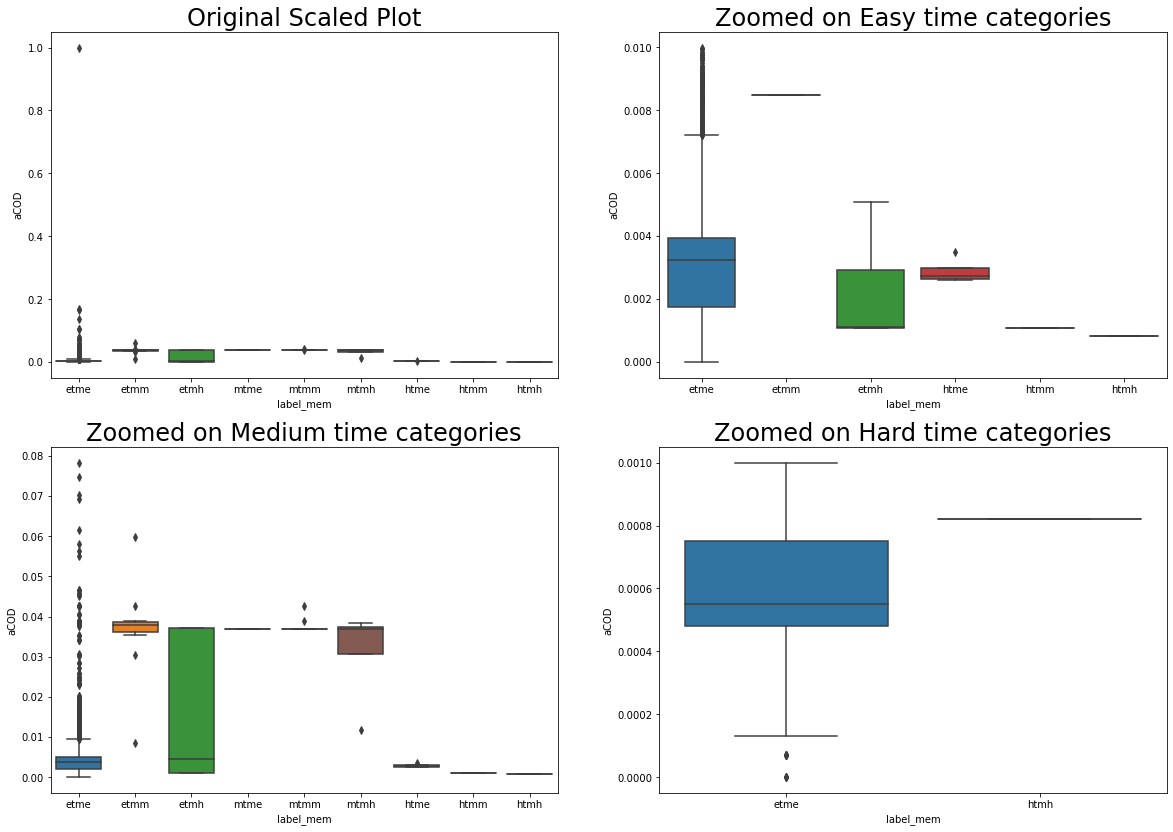

13 CYC


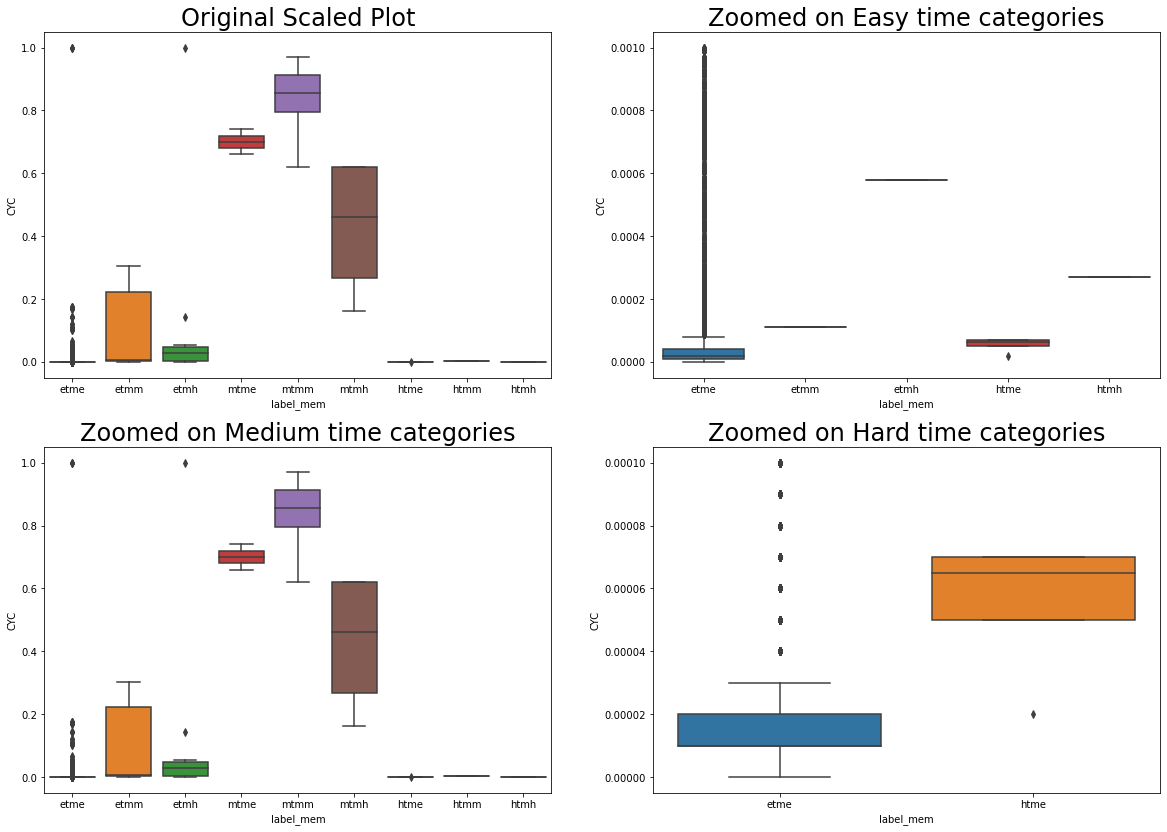

14 realisation_time_milsecs


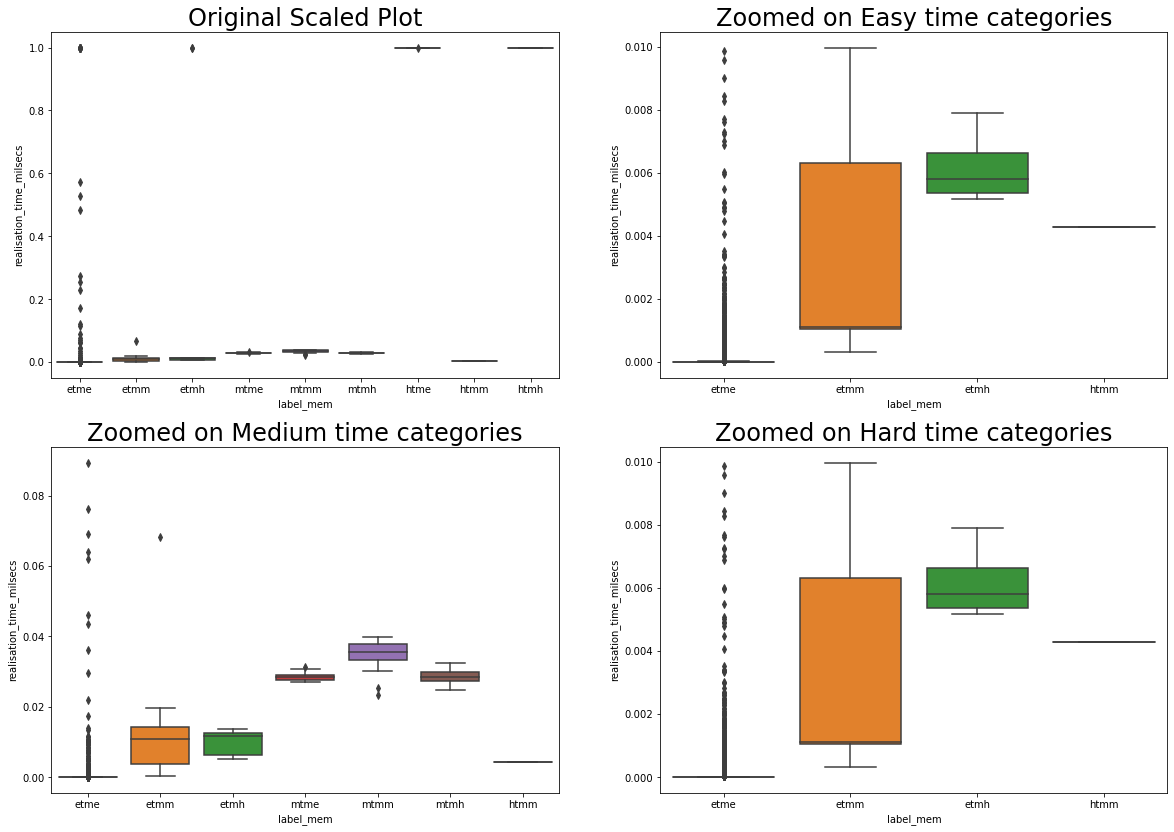

15 EFP


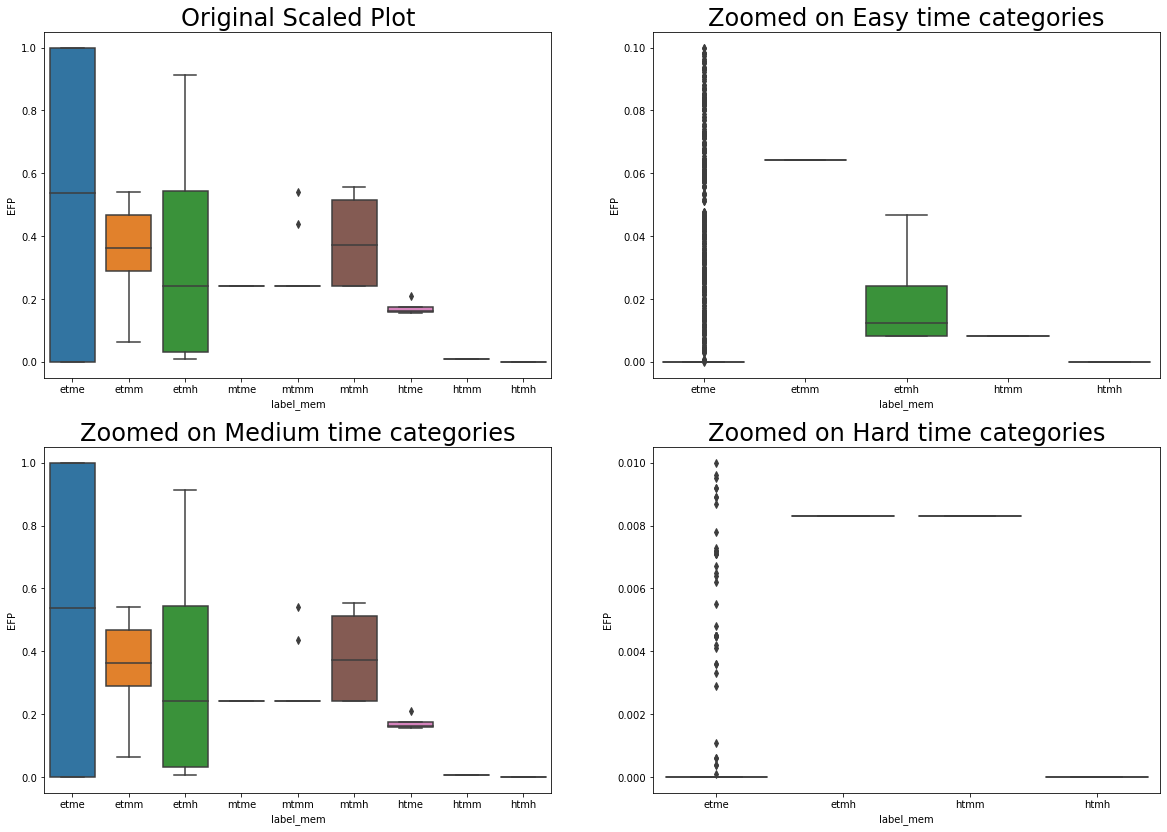

16 ELCLSPRT


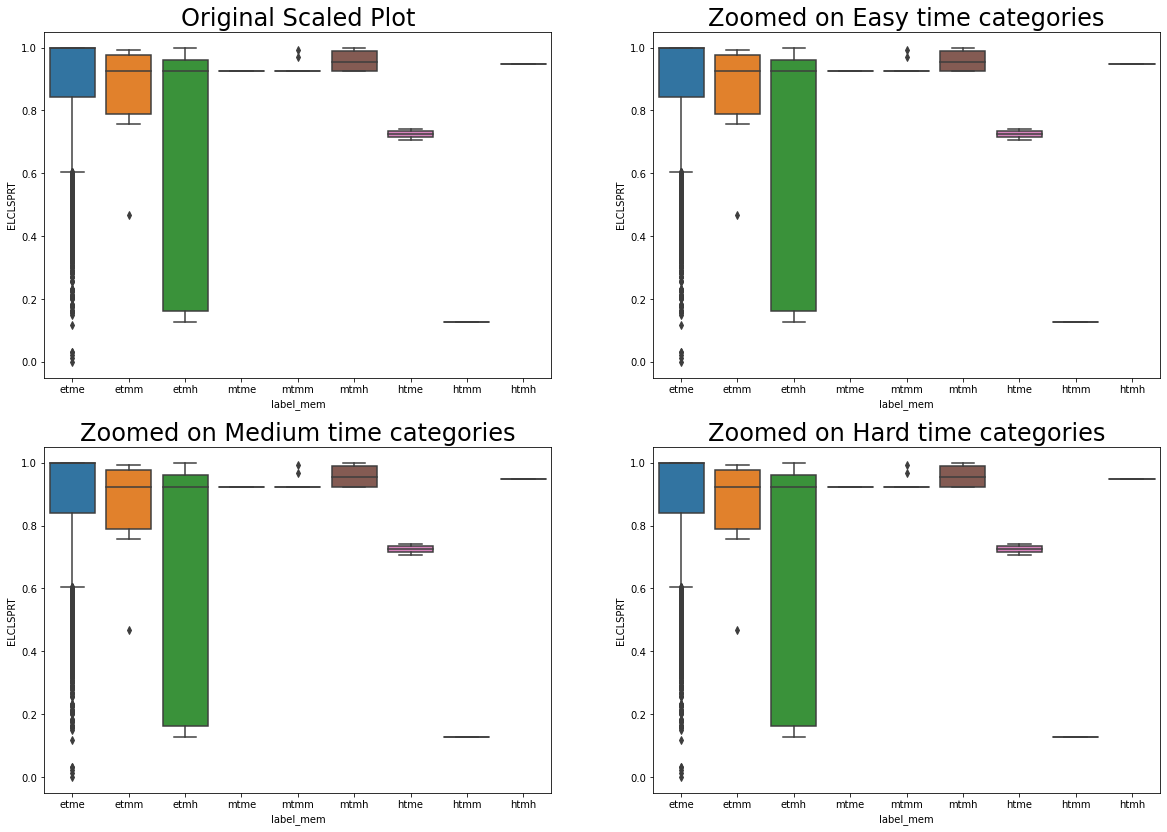

17 CONJP


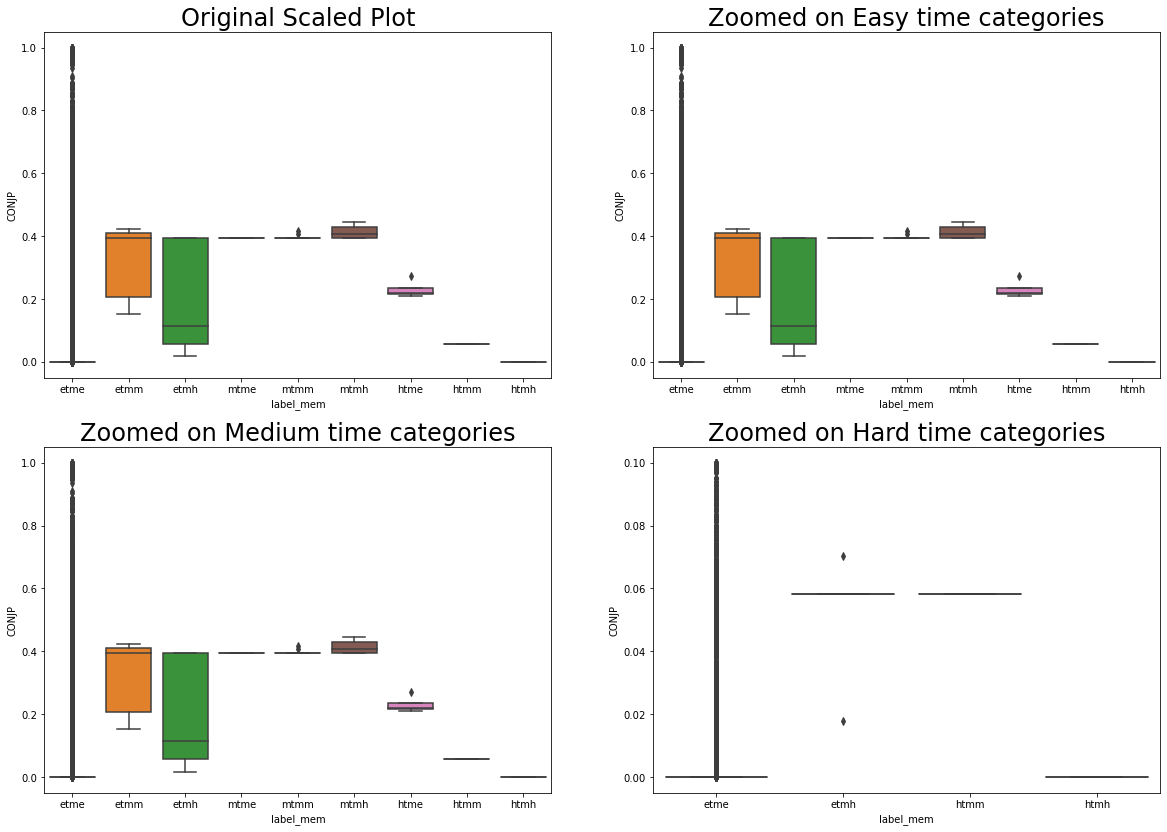

18 classification_size_kb


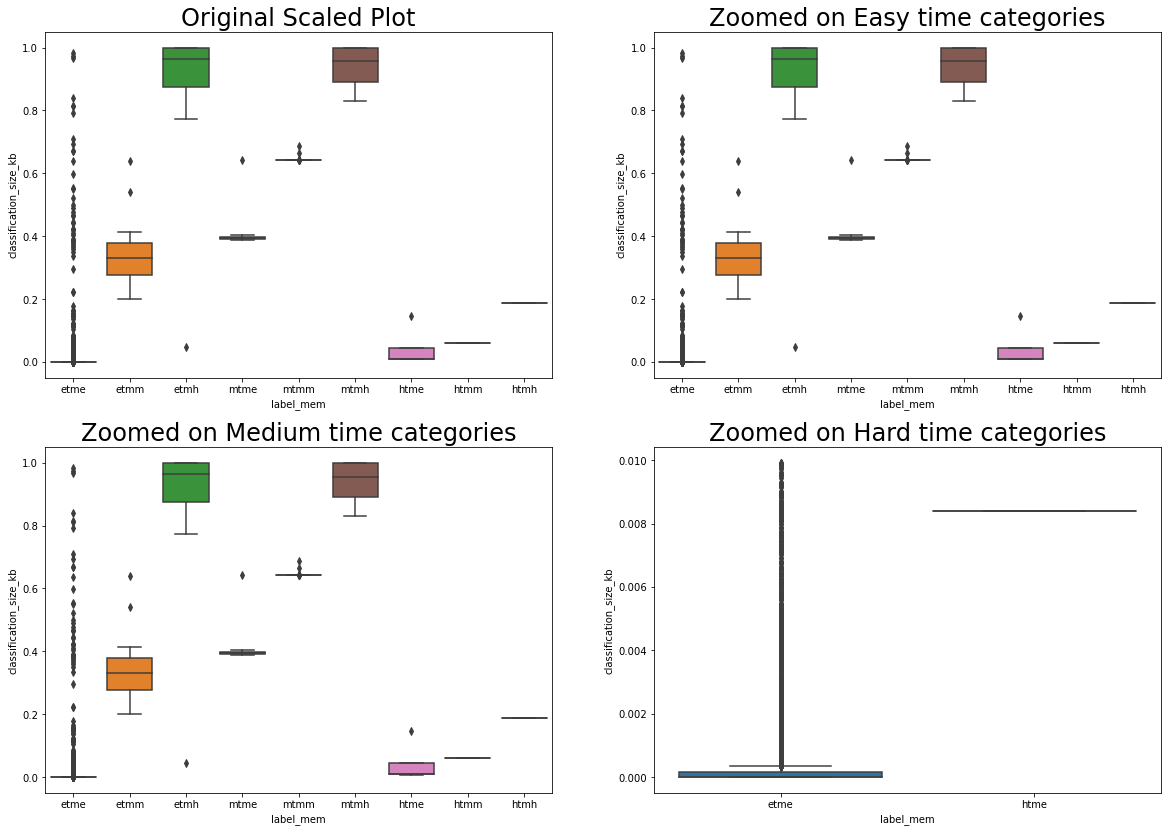

19 IHR


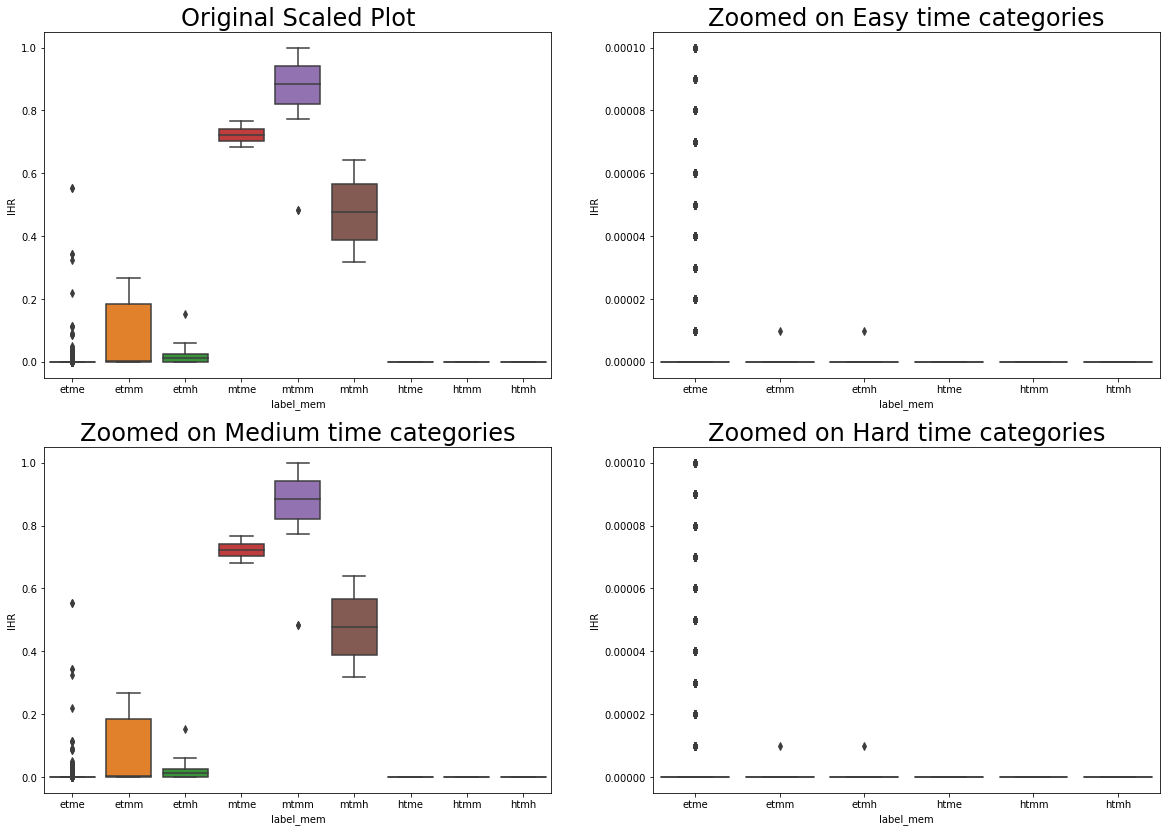

20 ITR


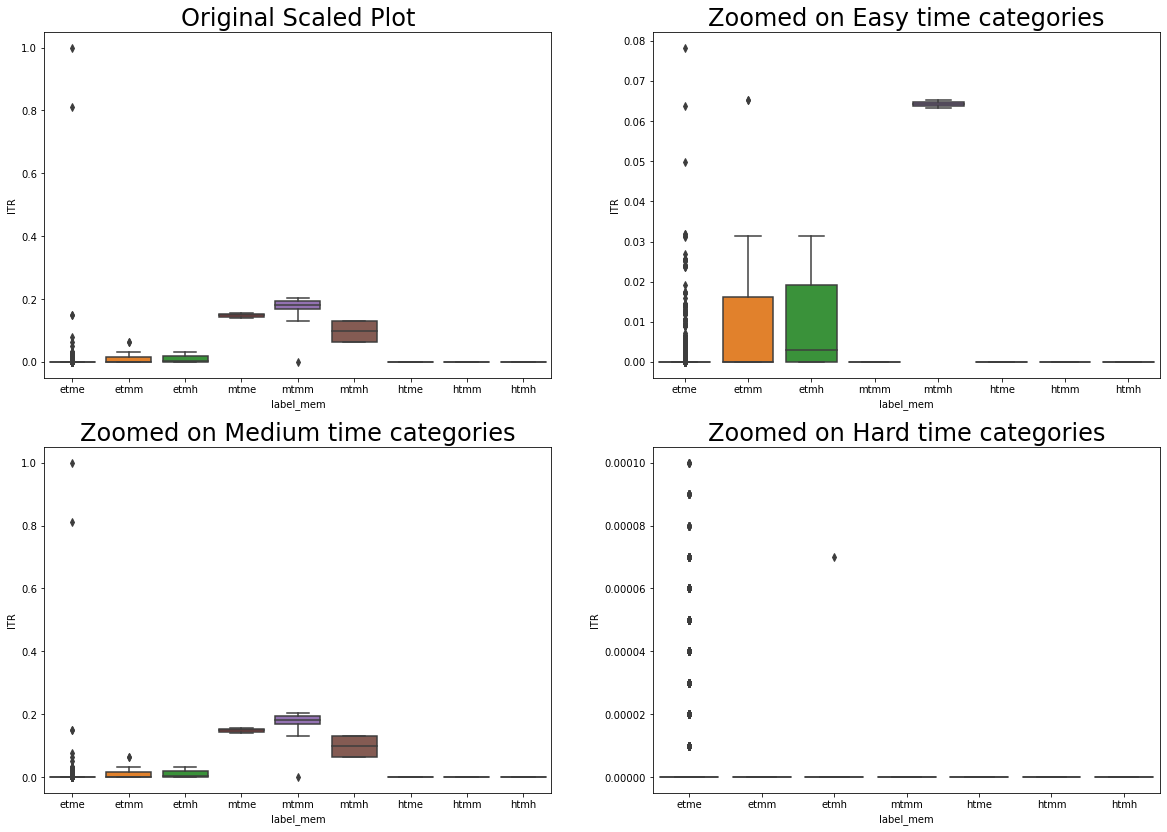

21 aNOP


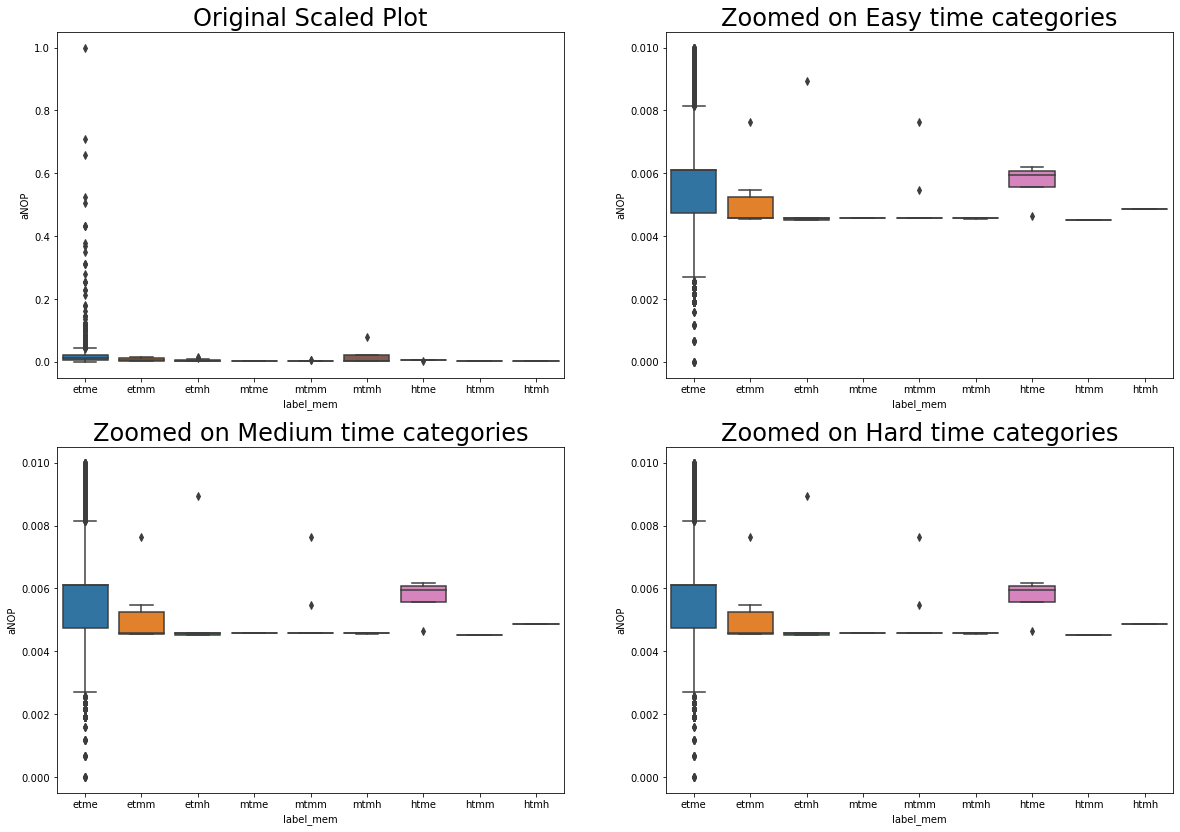

22 consistency_size_kb


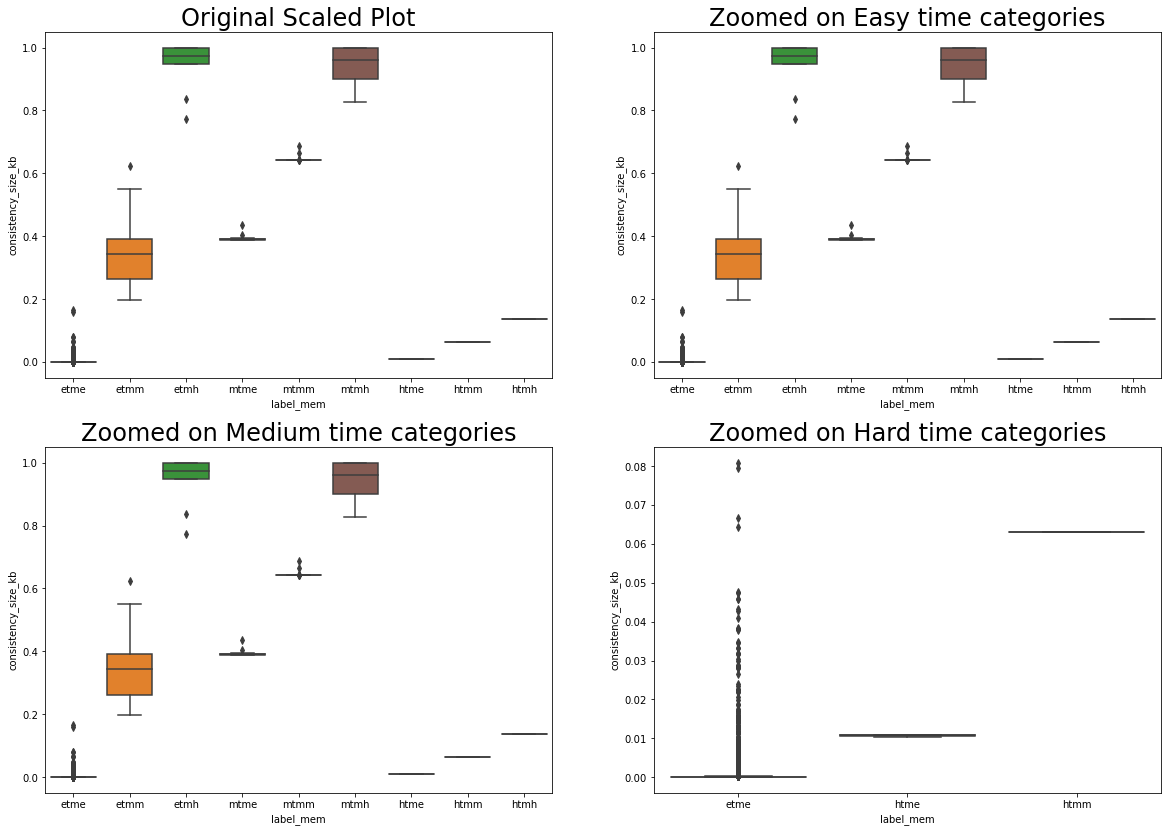

23 CAL_TIME


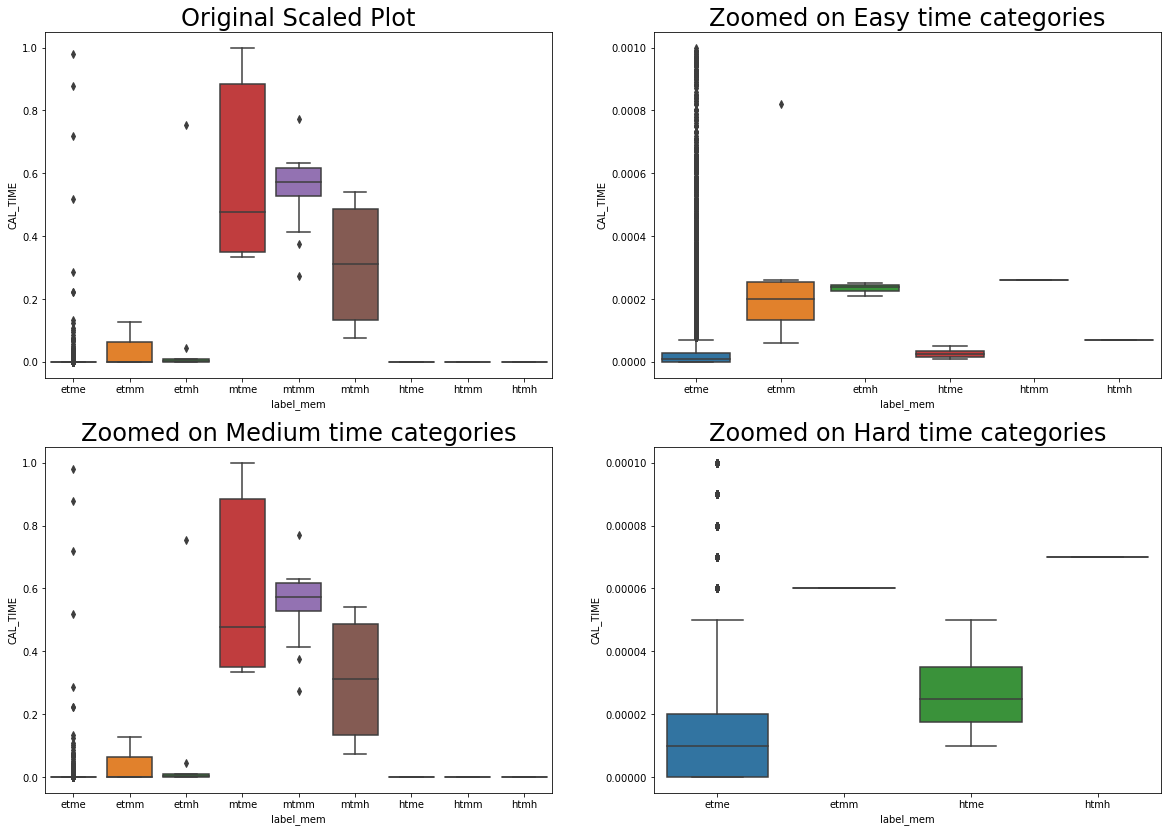

24 aCID


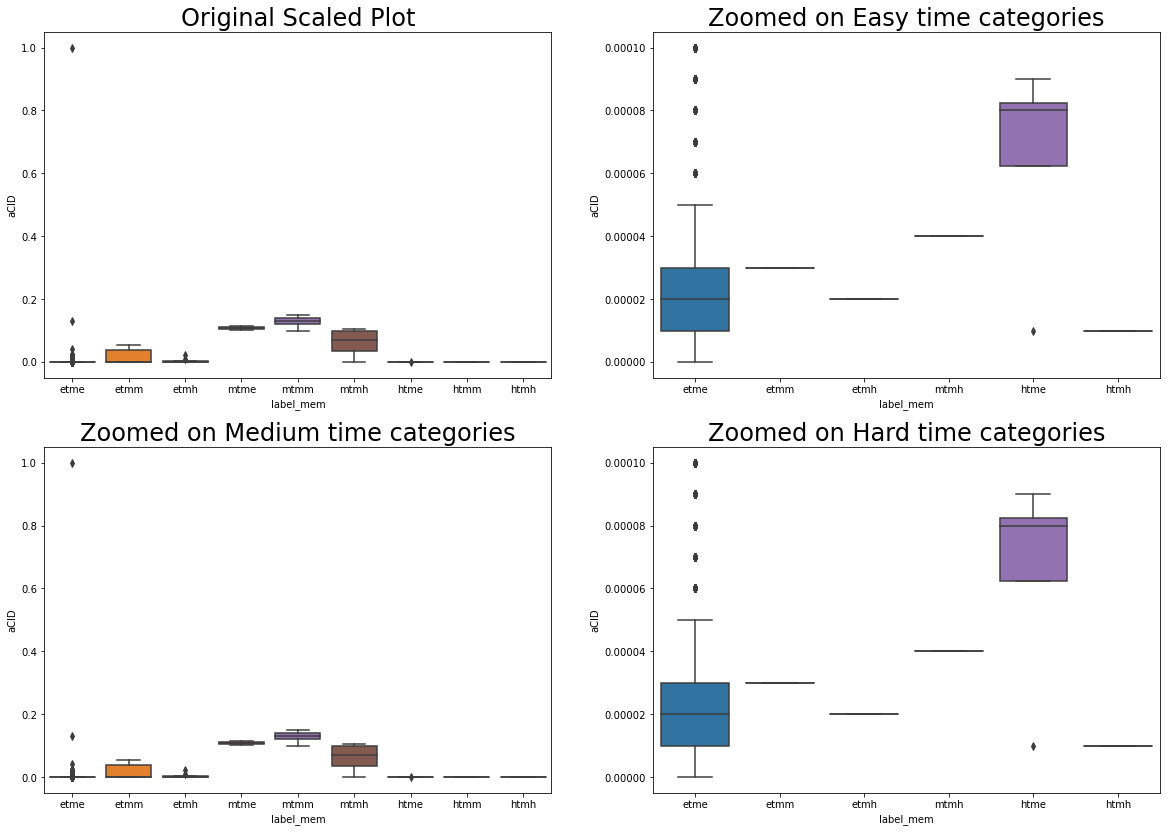

In [26]:
#***************** section for zoomed plot begins which can be used for anlysis further *******************

from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import collections
import math
import operator
%matplotlib inline

# this section contains the plots for common features in easy, medium and hard time category. Each plot has 4 
# subplots. top Left is original comparison of a feature among all the 9 categories after applying MinMax scalar
# top right is zoomed plot for 3 easy categories after a finding a common range between these 3 easy categories

# bottom left is zoomed plot for 3 medium categories after a finding a common range between these 3 medium 
# categories.

# bottom right is zoomed plot for 3 hard categories after a finding a common range between these 3 hard categories

# this common range is found out using an algorithm 
# in the algorithm we zoomed for 3 times. For the first time we zoom into the easy time category and 
# look in the ranges in this order (.00001 to 0.0001)  , (0.0001 to 0.001) , (0.001 to 0.01) , (0.01 to 0.1) ,
# (0.1 to 1) and we see in which range all 3 catgeories of easy time , such as easy_time_easy_memory,
# easy_time_medium_memory and easy_time_hard_memory are maximum present 
# suppose all 3 broader categories of easy_time are present in  (.00001 to 0.0001)  and (0.0001 to 0.001), then 
# we plot for (.00001 to 0.0001) range because here we can zoom more
# this happens for the rest two plots for medium and hard time category

def efficient_range(first_arr,second_arr,third_arr):
    
    first_arr_log_unique=np.unique(np.ceil(np.abs(np.log10(first_arr[first_arr != 0]))))
    
    second_arr_log_unique=np.unique(np.ceil(np.abs(np.log10(second_arr[second_arr != 0]))))
    
    third_arr_log_unique=np.unique(np.ceil(np.abs(np.log10(third_arr[third_arr != 0]))))
    
    log_power_intersect= np.intersect1d((np.intersect1d(first_arr_log_unique,second_arr_log_unique)),third_arr_log_unique)
    if len(log_power_intersect)==0:
        log_power_intersect=np.unique(np.union1d(np.union1d(first_arr_log_unique,second_arr_log_unique),third_arr_log_unique))
    log_power_intersect[::-1].sort() #descending order 
    
    flag = 0
    ans=0
    power_dict={}
    for i in range(len(log_power_intersect)):
        p=int(log_power_intersect[i])
        
        low=0
        high= round(1 * pow(10,-(p-1)),int(p))
        
        steps=list(np.round(np.arange(low,high,round(1 * pow(10,-p),int(p))),int(p)))
        steps.append(high)
        
        temp_dict={}
        temp_dict['first_arr']={}
        temp_dict['second_arr']={}
        temp_dict['third_arr']={}
        for j in range(1,len(steps)):
            lg=steps[j-1]
            rg=steps[j]
            val=(((lg <= first_arr) & (first_arr <= rg)).sum())
            temp_dict['first_arr'][j]=val
        
            val=(((lg <= second_arr) & (second_arr <= rg)).sum())
            temp_dict['second_arr'][j]=val
            
            val=(((lg <= third_arr) & (third_arr <= rg)).sum())
            temp_dict['third_arr'][j]=val
            
        
        all_catg=0
        for key,value in temp_dict.items():
            
            c=0
            for k1,v1 in value.items():
                if v1!=0:
                    c+=1
                    if c==2:
                        break
                else:
                    c=0
            if c==2:
                all_catg+=1
                
        if all_catg ==3:
            flag=1
            ans=int(p)
            break
        else:
            power_dict[int(p)]=all_catg
            break # break the outer loop
    
    if flag==1:
        return int(ans)
        
    else:
        if len(log_power_intersect)==0:
            return 5
        else:
            power_dict_sort = dict( sorted(power_dict.items(), key=operator.itemgetter(1),reverse=True))
            ans = int(list(power_dict_sort.keys())[0])
            return int(ans)
            
            
for i in range(len(rows)):
    
    f=rows[i]
    print(i,f)
    x_df=easy_time_mem_easy.loc[:, [f, 'label_mem']]
    x_df['label_mem']="etme"
    
    
    temp=easy_time_mem_medium.loc[:, [f, 'label_mem']]
    temp['label_mem']="etmm"
    x_df=x_df.append(temp,ignore_index=True)
    temp_etmm= easy_time_mem_medium.loc[:, f]
    
    temp=easy_time_mem_hard.loc[:, [f, 'label_mem']]
    temp['label_mem']="etmh"
    x_df=x_df.append(temp,ignore_index=True)
    temp_etmh= easy_time_mem_hard.loc[:, f]
    
    temp=medium_time_mem_easy.loc[:, [f, 'label_mem']]
    temp['label_mem']="mtme"
    x_df=x_df.append(temp,ignore_index=True)
    temp_mtme= medium_time_mem_easy.loc[:, f]
    
    temp=medium_time_mem_medium.loc[:, [f, 'label_mem']]
    temp['label_mem']="mtmm"
    x_df=x_df.append(temp,ignore_index=True)
    temp_mtmm= medium_time_mem_medium.loc[:, f]
    
    temp=medium_time_mem_hard.loc[:, [f, 'label_mem']]
    temp['label_mem']="mtmh"
    x_df=x_df.append(temp,ignore_index=True)
    temp_mtmh= medium_time_mem_hard.loc[:, f]
    
    temp=hard_time_mem_easy.loc[:, [f, 'label_mem']]
    temp['label_mem']="htme"
    x_df=x_df.append(temp,ignore_index=True)
    temp_htme= hard_time_mem_easy.loc[:, f]
    
    temp=hard_time_mem_medium.loc[:, [f, 'label_mem']]
    temp['label_mem']="htmm"
    x_df=x_df.append(temp,ignore_index=True)
    temp_htmm= hard_time_mem_medium.loc[:, f]
    
    temp=hard_time_mem_hard.loc[:, [f, 'label_mem']]
    temp['label_mem']="htmh"
    x_df=x_df.append(temp,ignore_index=True)
    temp_htmh= hard_time_mem_hard.loc[:, f]
    
    trans = MinMaxScaler()
    #trans= RobustScaler(quantile_range = (0.1,0.9))
    temp_df=pd.DataFrame(x_df.loc[:,f])
    df_trans=np.round(trans.fit_transform(temp_df),5)
    df_trans_new = pd.DataFrame(data=df_trans,columns=[f])
    df_trans_new["label_mem"] = list(x_df["label_mem"])
    
    
    
    
    temp_etme=np.sort((df_trans_new[df_trans_new["label_mem"]=="etme"])[f])
    temp_etmm=np.sort((df_trans_new[df_trans_new["label_mem"]=="etmm"])[f])
    temp_etmh=np.sort((df_trans_new[df_trans_new["label_mem"]=="etmh"])[f])
    easy_log_ans = efficient_range(temp_etme,temp_etmm,temp_etmh)
    easy_rx , easy_ry = 0 , round(1 * pow(10,-(easy_log_ans-1)),int(easy_log_ans))
    #print(easy_rx ,easy_ry)
    
    
    temp_mtme=np.sort((df_trans_new[df_trans_new["label_mem"]=="mtme"])[f])
    temp_mtmm=np.sort((df_trans_new[df_trans_new["label_mem"]=="mtmm"])[f])
    temp_mtmh=np.sort((df_trans_new[df_trans_new["label_mem"]=="mtmh"])[f])
    medium_log_ans = efficient_range(temp_mtme,temp_mtmm,temp_mtmh)
    medium_rx, medium_ry = 0 , round(1 * pow(10,-(medium_log_ans-1)),int(medium_log_ans))
    #print(medium_rx ,medium_ry)
    
    
    temp_htme=np.sort((df_trans_new[df_trans_new["label_mem"]=="htme"])[f])
    temp_htmm=np.sort((df_trans_new[df_trans_new["label_mem"]=="htmm"])[f])
    temp_htmh=np.sort((df_trans_new[df_trans_new["label_mem"]=="htmh"])[f])
    hard_log_ans = efficient_range(temp_htme,temp_htmm,temp_htmh)
    hard_rx, hard_ry = 0 , round(1 * pow(10,-(hard_log_ans-1)),int(hard_log_ans))
    #print(hard_rx ,hard_ry)
    
    
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 14))
    sns.boxplot(y=df_trans_new.columns[0] , x="label_mem",data=df_trans_new,ax=ax1)
    ax1.set_title( "Original Scaled Plot" , size = 24 )
    
    new_df2=df_trans_new[(df_trans_new[f]>= easy_rx) & (df_trans_new[f]<=  easy_ry)]# for easy ones
    sns.boxplot(y=new_df2.columns[0] , x="label_mem",data=new_df2,ax=ax2)
    ax2.set_title( "Zoomed on Easy time categories" , size = 24 )
    
    new_df3=df_trans_new[(df_trans_new[f]>= medium_rx) & (df_trans_new[f]<=  medium_ry)]# for medium ones
    sns.boxplot(y=new_df3.columns[0] , x="label_mem",data=new_df3,ax=ax3)
    ax3.set_title( "Zoomed on Medium time categories" , size = 24 )
    
    new_df4=df_trans_new[(df_trans_new[f]>= hard_rx) & (df_trans_new[f]<=  hard_ry)]# for hard ones
    sns.boxplot(y=new_df4.columns[0] , x="label_mem",data=new_df4,ax=ax4)
    ax4.set_title( "Zoomed on Hard time categories" , size = 24 )
    #plt.savefig('/home/ritam/ontology_hardness/plots_for_comparison_with_all_category/'+str(f)+'.jpeg')
    plt.show()
    
    
    
#**************************************ends plotting *************************************

In [27]:
df_trans_new

,aCID,label_mem
0,0.00008,etme
1,0.00001,etme
2,0.00004,etme
3,0.00003,etme
4,0.00003,etme
...,...,...
16427,0.00008,htme
16428,0.00008,htme
16429,0.00009,htme
16430,0.00103,htmm
